In [616]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pydove as dv
import datetime
import re
sns.set(font_scale=1.5)

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [1179]:
def prefix2num_gb(string):
    if isinstance(string, float) and np.isnan(string):
        return string
    elif string is pd.NA:
        return np.nan
    elif string.endswith(' GB'):
        return float(string.replace(' GB', ''))*1
    elif string.endswith(' MB'):
        return float(string.replace(' MB', ''))/1_000
    elif string.endswith(' KB'):
        return float(string.replace(' KB', ''))/1_000_000
    else:
        raise(string)

In [1363]:
df = pd.read_csv('game-debate-scraper/game-debate_start_12_5900.csv')
df = pd.concat((df, pd.read_csv('game-debate-scraper/game-debate_start_5901_7300.csv')))
df = pd.concat((df, pd.read_csv('game-debate-scraper/game-debate_start_7301_10000.csv')))
df = pd.concat((df, pd.read_csv('game-debate-scraper/game-debate_start_10001_20000.csv')))
#df = pd.read_csv('game-debate-scraper/game-debate_start_12_600_old.csv')
df.replace('-', pd.NA, inplace=True)
df.Release = pd.to_datetime(df.Release)
df

,ID,Title,Release,Genres,Theme,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,...,INTELCPU4,AMDCPU4,NVIDIAGPU4,AMDGPU4,VRAM4,RAM4,OS4,DX4,HDD4,req4type
0,12,Mass Effect System Requirements,2008-06-06,"['Action', 'RPG', 'Sci fi ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2400+,GeForce 8600 GS,Radeon X1300 256MB,256 MB,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
1,13,Spore System Requirements,2008-09-05,"['Management', 'Strategy', 'Social ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
2,14,Sins of a Solar Empire System Requirements,2008-06-20,"['Management', 'Strategy', 'Sci fi ']",<NA>,Pentium 4 1.8GHz,Athlon XP 1800+,GeForce 6600,Radeon 9600 Series,128 MB,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3,15,Galactic Civilizations II: Dread Lords (1) Sys...,2006-03-03,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4,16,Galactic Civilizations II: Dark Avatar (2) Sys...,2007-02-14,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,17111,Platformines System Requirements,2014-03-28,"['Action', 'Adventure', 'Platformer', 'Retro ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
71,17112,Eterium System Requirements,2014-04-15,"['Action', 'Sim', 'Sci fi ']",<NA>,Core 2 Duo E4300 1.8GHz,Athlon 64 X2 Dual Core 3600+,GeForce 6600,Radeon X1050,128 MB,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
72,17113,The Seed System Requirements,NaT,"['Adventure', 'Sci fi', 'War ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2200+,GeForce FX 5900XT,Radeon 9600 Series,128 MB,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
73,17114,League of Legends System Requirements,2009-10-27,"['Action', 'MOBA', 'Online', 'Fantasy ']",<NA>,Core 2 Duo E4400 2.0GHz,Athlon 64 X2 Dual Core 4000+,GeForce FX 5950 Ultra,Radeon 9500 Pro,128 MB,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [1364]:
df['hdd_minimal_gb'] = df.HDD1.apply(prefix2num_gb)
df['hdd_rec_gb'] = df.HDD3.apply(prefix2num_gb)
df['ram_minimal_gb'] = df.RAM1.apply(prefix2num_gb)
df['ram_rec_gb'] = df.RAM3.apply(prefix2num_gb)
df['vram_minimal_gb'] = df.VRAM1.apply(prefix2num_gb)
df['vram_rec_gb'] = df.VRAM3.apply(prefix2num_gb)

In [1365]:
df

,ID,Title,Release,Genres,Theme,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,...,OS4,DX4,HDD4,req4type,hdd_minimal_gb,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb
0,12,Mass Effect System Requirements,2008-06-06,"['Action', 'RPG', 'Sci fi ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2400+,GeForce 8600 GS,Radeon X1300 256MB,256 MB,...,<NA>,<NA>,<NA>,<NA>,12.0,NaN,1.0,NaN,0.256,NaN
1,13,Spore System Requirements,2008-09-05,"['Management', 'Strategy', 'Social ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
2,14,Sins of a Solar Empire System Requirements,2008-06-20,"['Management', 'Strategy', 'Sci fi ']",<NA>,Pentium 4 1.8GHz,Athlon XP 1800+,GeForce 6600,Radeon 9600 Series,128 MB,...,<NA>,<NA>,<NA>,<NA>,3.0,NaN,0.5,NaN,0.128,NaN
3,15,Galactic Civilizations II: Dread Lords (1) Sys...,2006-03-03,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
4,16,Galactic Civilizations II: Dark Avatar (2) Sys...,2007-02-14,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,17111,Platformines System Requirements,2014-03-28,"['Action', 'Adventure', 'Platformer', 'Retro ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
71,17112,Eterium System Requirements,2014-04-15,"['Action', 'Sim', 'Sci fi ']",<NA>,Core 2 Duo E4300 1.8GHz,Athlon 64 X2 Dual Core 3600+,GeForce 6600,Radeon X1050,128 MB,...,<NA>,<NA>,<NA>,<NA>,0.5,NaN,2.0,2.0,0.128,0.320
72,17113,The Seed System Requirements,NaT,"['Adventure', 'Sci fi', 'War ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2200+,GeForce FX 5900XT,Radeon 9600 Series,128 MB,...,<NA>,<NA>,<NA>,<NA>,3.0,NaN,1.0,NaN,0.128,NaN
73,17114,League of Legends System Requirements,2009-10-27,"['Action', 'MOBA', 'Online', 'Fantasy ']",<NA>,Core 2 Duo E4400 2.0GHz,Athlon 64 X2 Dual Core 4000+,GeForce FX 5950 Ultra,Radeon 9500 Pro,128 MB,...,<NA>,<NA>,<NA>,<NA>,8.0,NaN,1.0,NaN,0.128,NaN


In [1366]:
df.dtypes

ID                          int64
Title                      object
Release            datetime64[ns]
Genres                     object
Theme                      object
INTELCPU1                  object
AMDCPU1                    object
NVIDIAGPU1                 object
AMDGPU1                    object
VRAM1                      object
RAM1                       object
OS1                        object
DX1                        object
HDD1                       object
INTELCPU2                  object
AMDCPU2                    object
NVIDIAGPU2                 object
AMDGPU2                    object
VRAM2                      object
RAM2                       object
OS2                        object
DX2                        object
HDD2                       object
INTELCPU3                  object
AMDCPU3                    object
NVIDIAGPU3                 object
AMDGPU3                    object
VRAM3                      object
RAM3                       object
OS3           

In [1367]:
df.describe()

,ID,hdd_minimal_gb,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb
count,7871.000000,2040.000000,944.000000,2176.000000,1101.000000,1819.000000,1079.000000
mean,4512.687333,6.892278,8.013496,1.737958,2.962093,0.346013,0.512584
std,2873.711955,12.218333,12.118958,1.346418,1.668358,0.420299,0.605117
min,12.000000,0.020000,0.050000,0.128000,0.032000,0.016000,0.016000
25%,2225.500000,1.000000,1.000000,1.000000,2.000000,0.128000,0.256000
50%,4217.000000,3.000000,3.000000,1.000000,2.000000,0.256000,0.256000
75%,6199.500000,8.000000,9.250000,2.000000,4.000000,0.256000,0.512000
max,17129.000000,200.000000,85.000000,16.000000,16.000000,6.000000,8.000000


In [1368]:
df.describe(include=np.int64)

,ID
count,7871.000000
mean,4512.687333
std,2873.711955
min,12.000000
25%,2225.500000
50%,4217.000000
75%,6199.500000
max,17129.000000


In [1369]:
df.describe(include=np.datetime64)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Release
count,6269
unique,3007
top,2012-09-19 00:00:00
freq,21
first,1979-12-25 00:00:00
last,2021-06-10 00:00:00


In [1370]:
df.describe(include=np.object)

,Title,Genres,Theme,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,RAM1,OS1,...,INTELCPU4,AMDCPU4,NVIDIAGPU4,AMDGPU4,VRAM4,RAM4,OS4,DX4,HDD4,req4type
count,7871,6388,0,2175,2173,2109,2147,1819,2176,2167,...,11,11,11,11,11,11,11,11,11,11
unique,7866,1136,0,144,165,174,205,17,14,11,...,11,10,9,11,8,3,3,3,8,3
top,System Requirements,['Adventure '],NaN,Pentium 4 1.8GHz,Athlon XP 1700+,GeForce 210,Radeon X600 Series,256 MB,1 GB,Win Xp 32,...,Core i7-7700 4-Core 3.6GHz,FX-9370,GeForce GTX 1080 Ti,Radeon HD 6770,8 GB,8 GB,Win 7 64,DX 11,20 GB,Ultra Requirements
freq,5,476,NaN,403,420,433,426,696,942,1796,...,1,2,2,1,3,6,6,8,2,8


In [1371]:
def fix_ghz(string):
    if isinstance(string, float) and np.isnan(string):
        return string
    elif string is pd.NA:
        return string
    elif 'GHz' in string:
        if not string.endswith('GHz'):
            return string
        elif ' GHz' in string:
            m = re.search('(.*) (\d+)\.(\d+) GHz$', string)
            return f'{m[1]} {m[2]}.'+((m[3]+'0') if len(m[3]) == 1 else m[3])+'GHz'
        elif '.' in string:
            m = re.search('(.*) (\d+)\.(\d+)GHz$', string)
            if m is None:
                return string
            return f'{m[1]} {m[2]}.'+((m[3]+'0') if len(m[3]) == 1 else m[3])+'GHz'
        else:
            m = re.search('(.*) (\d+)GHz$', string)
            return f'{m[1]} {m[2]}.'+'00GHz'
    else:
        return string

In [1372]:
df['min_intel_cpu'] = df['INTELCPU1'].apply(fix_ghz).str.replace('Dual-Core ', '', regex=False).str.replace('Core 2 ', 'Core2 ', regex=False).str.replace('Dual Core ', '', regex=False)
df['rec_intel_cpu'] = df['INTELCPU2'].apply(fix_ghz).str.replace('Dual-Core ', '', regex=False).str.replace('Core 2 ', 'Core2 ', regex=False).str.replace('Dual Core ', '', regex=False)

In [1373]:
df['min_amd_cpu'] = df['AMDCPU1'].apply(fix_ghz).str.replace(' Dual-Core', '', regex=False).str.replace(' Dual Core', '', regex=False).str.replace(' X2', '', regex=False).str.replace(' Quad-Core', '', regex=False) \
    .str.replace('Ryzen R3', 'Ryzen 3', regex=False).str.replace('Ryzen R5', 'Ryzen 5', regex=False).str.replace(' Black Edition', '', regex=False).str.replace(' Quad Core', '', regex=False)
df['rec_amd_cpu'] = df['AMDCPU2'].apply(fix_ghz).str.replace(' Dual-Core', '', regex=False).str.replace(' Dual Core', '', regex=False).str.replace(' X2', '', regex=False).str.replace(' Quad-Core', '', regex=False) \
    .str.replace('Ryzen R3', 'Ryzen 3', regex=False).str.replace('Ryzen R5', 'Ryzen 5', regex=False).str.replace(' Black Edition', '', regex=False).str.replace(' Quad Core', '', regex=False)
# black edition for amd is allowed overclocking but I ignore it now https://www.zive.cz/bleskovky/uz-zadne-black-edition-taktovatelne-procesory-zen-pojmenuje-amd-podle-intelu/sc-4-a-184851/default.aspx

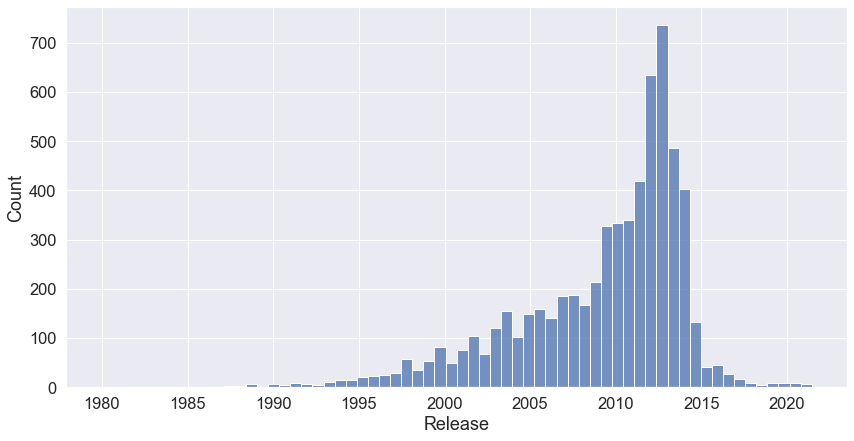

In [1374]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x="Release")

In [1375]:
df.columns

Index(['ID', 'Title', 'Release', 'Genres', 'Theme', 'INTELCPU1', 'AMDCPU1',
       'NVIDIAGPU1', 'AMDGPU1', 'VRAM1', 'RAM1', 'OS1', 'DX1', 'HDD1',
       'INTELCPU2', 'AMDCPU2', 'NVIDIAGPU2', 'AMDGPU2', 'VRAM2', 'RAM2', 'OS2',
       'DX2', 'HDD2', 'INTELCPU3', 'AMDCPU3', 'NVIDIAGPU3', 'AMDGPU3', 'VRAM3',
       'RAM3', 'OS3', 'DX3', 'HDD3', 'INTELCPU4', 'AMDCPU4', 'NVIDIAGPU4',
       'AMDGPU4', 'VRAM4', 'RAM4', 'OS4', 'DX4', 'HDD4', 'req4type',
       'hdd_minimal_gb', 'hdd_rec_gb', 'ram_minimal_gb', 'ram_rec_gb',
       'vram_minimal_gb', 'vram_rec_gb', 'min_intel_cpu', 'rec_intel_cpu',
       'min_amd_cpu', 'rec_amd_cpu'],
      dtype='object')

In [1376]:
columns = ['INTELCPU1', 'AMDCPU1',
       'NVIDIAGPU1', 'AMDGPU1', 'VRAM1', 'RAM1', 'OS1', 'DX1', 'HDD1',
       'INTELCPU2', 'AMDCPU2', 'NVIDIAGPU2', 'AMDGPU2', 'VRAM2', 'RAM2', 'OS2',
       'DX2', 'HDD2', 'INTELCPU3', 'AMDCPU3', 'NVIDIAGPU3', 'AMDGPU3', 'VRAM3',
       'RAM3', 'OS3', 'DX3', 'HDD3']

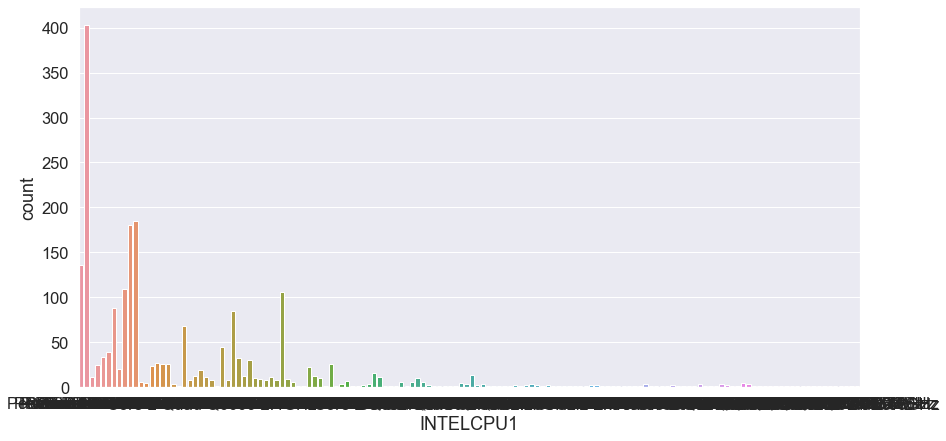

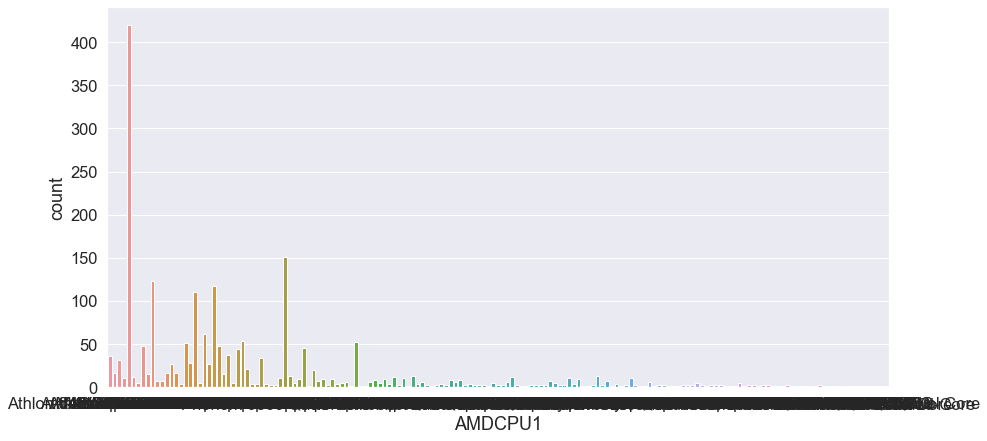

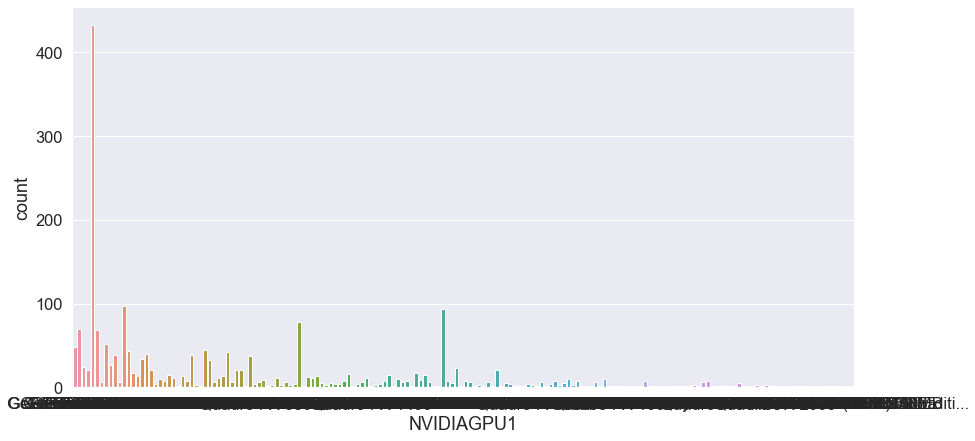

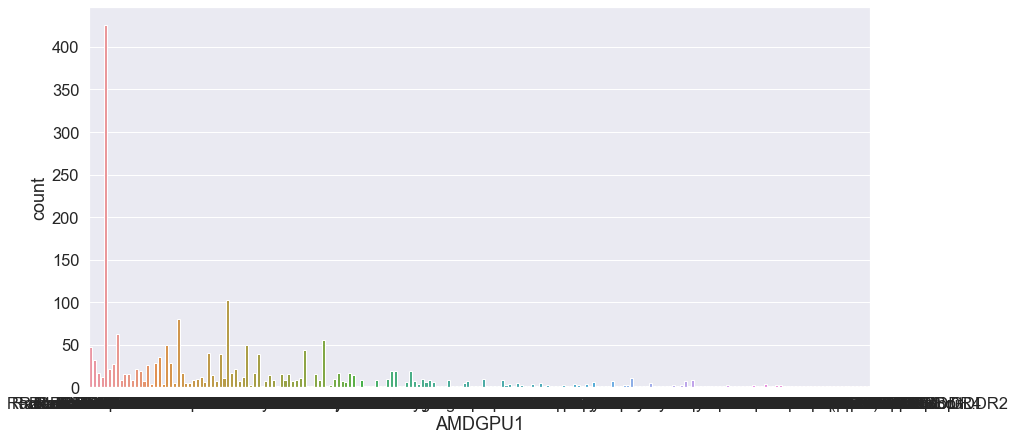

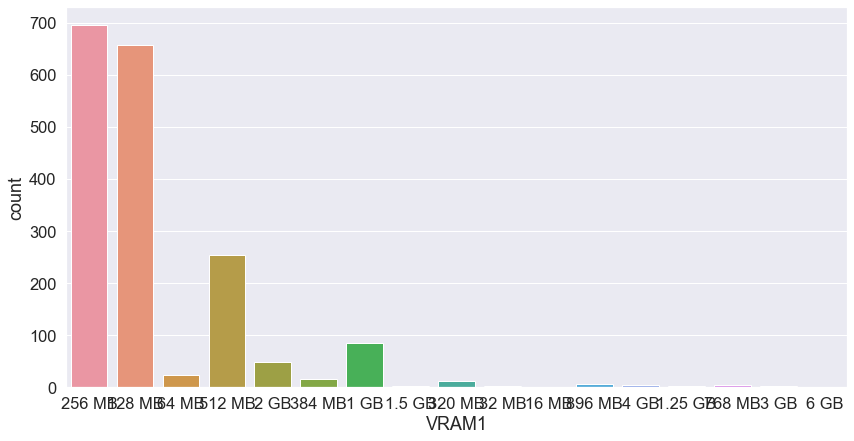

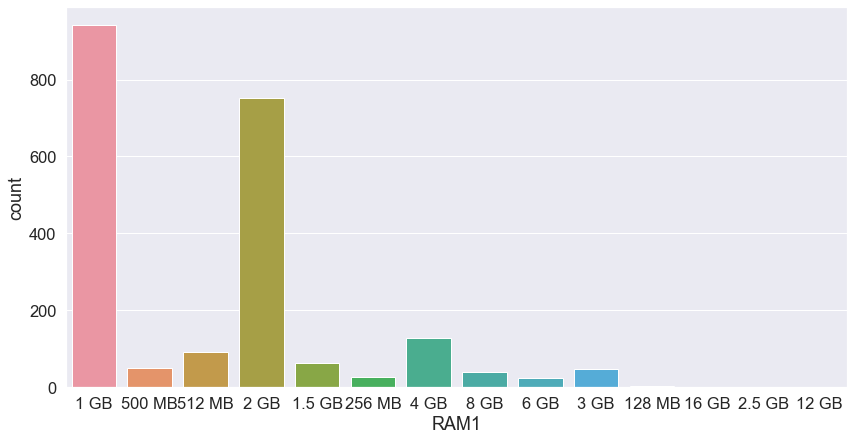

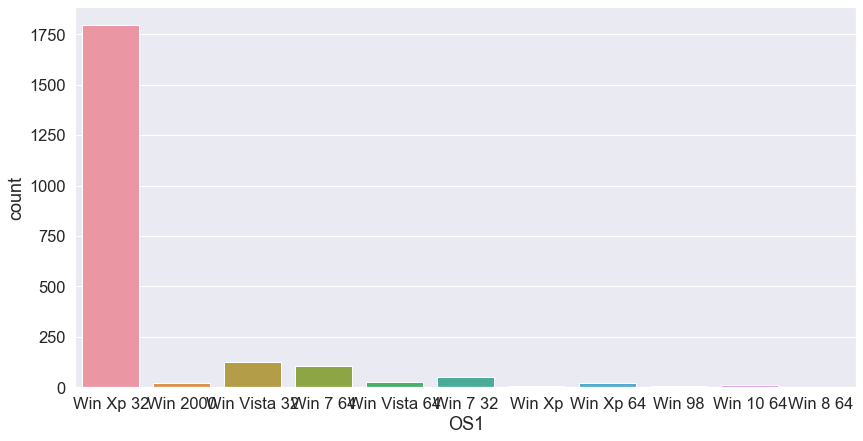

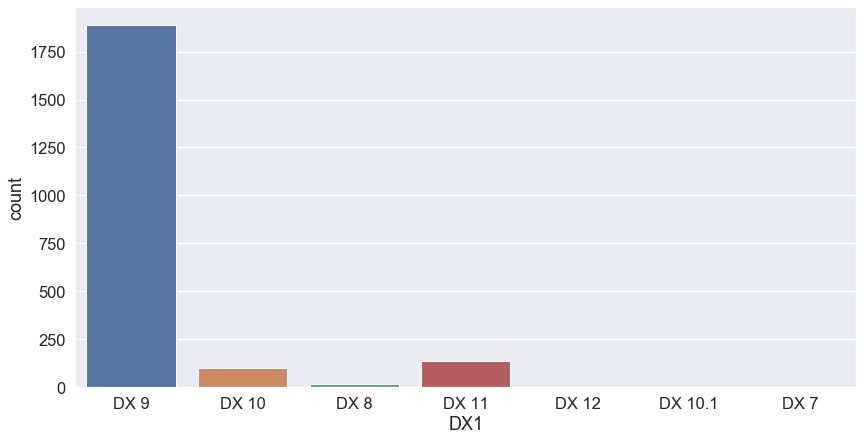

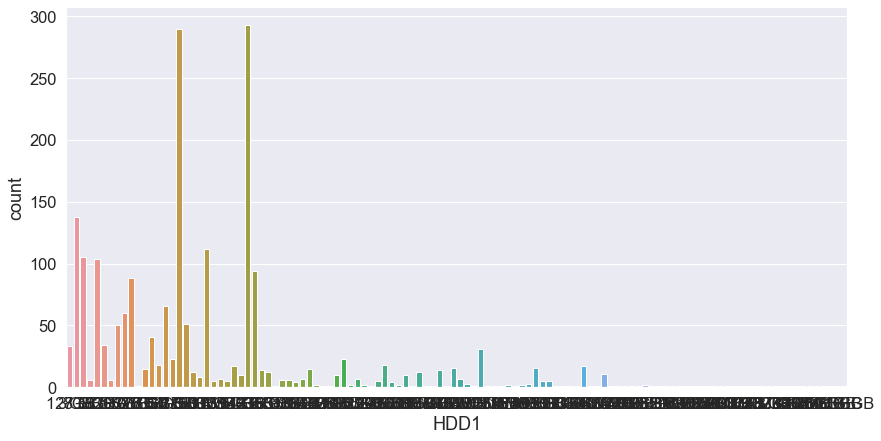

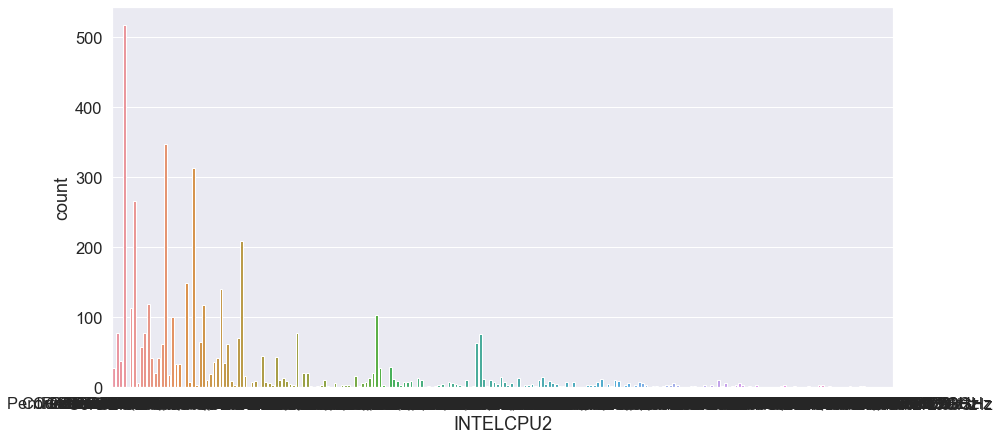

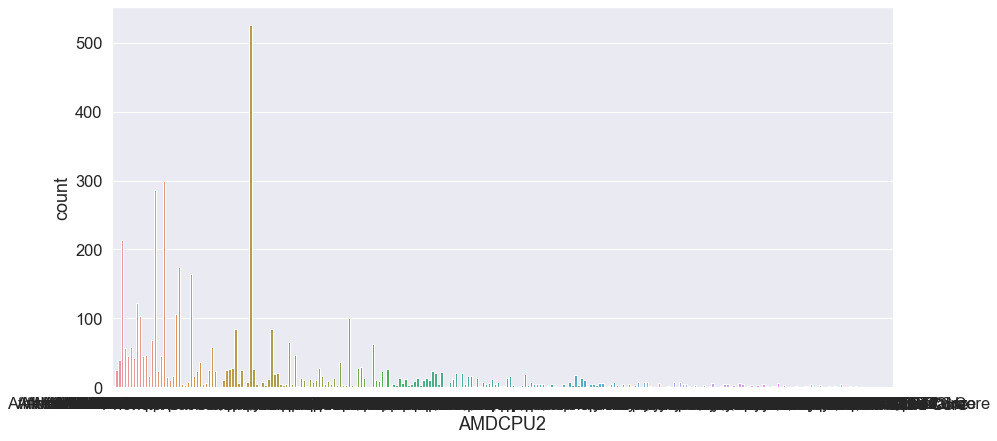

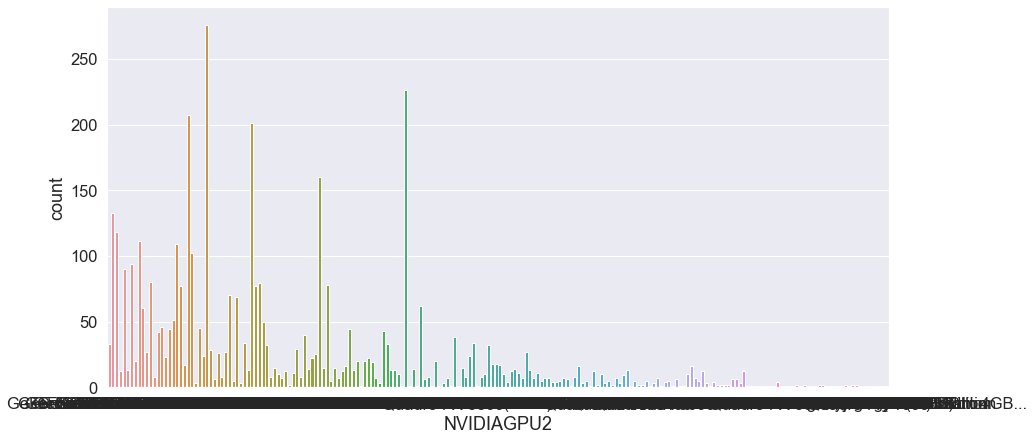

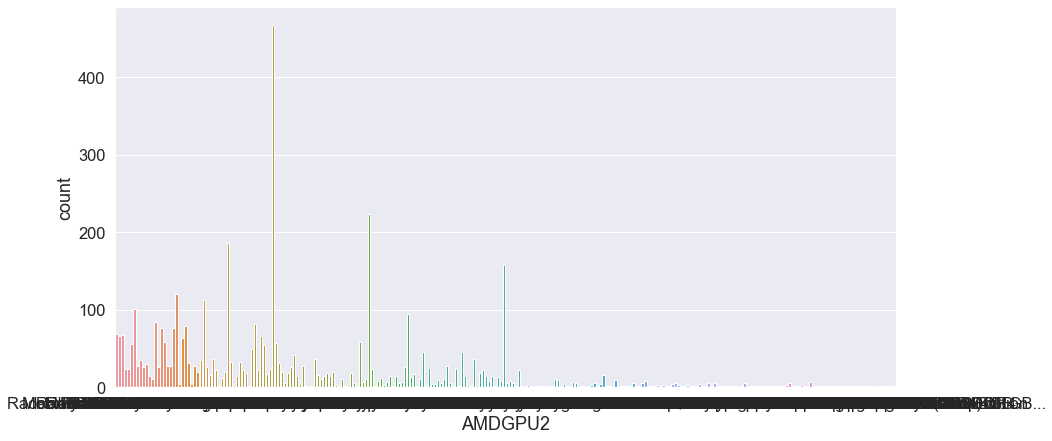

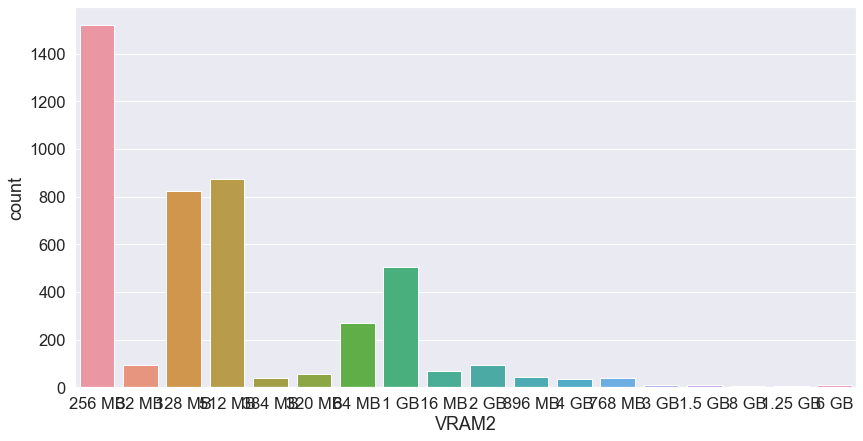

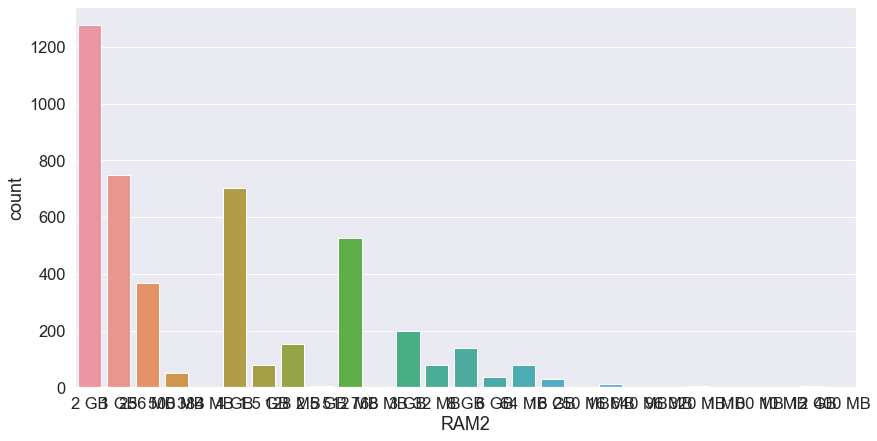

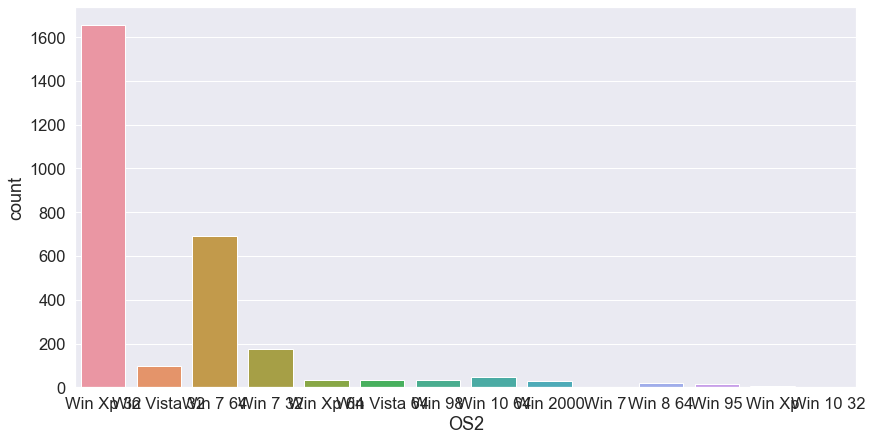

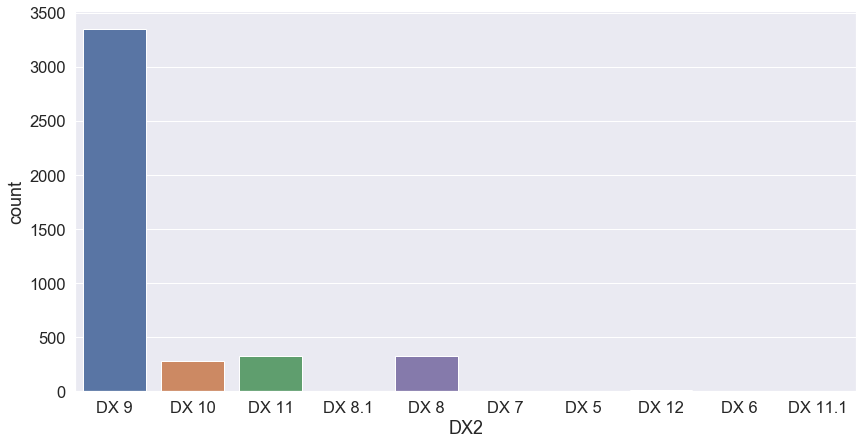

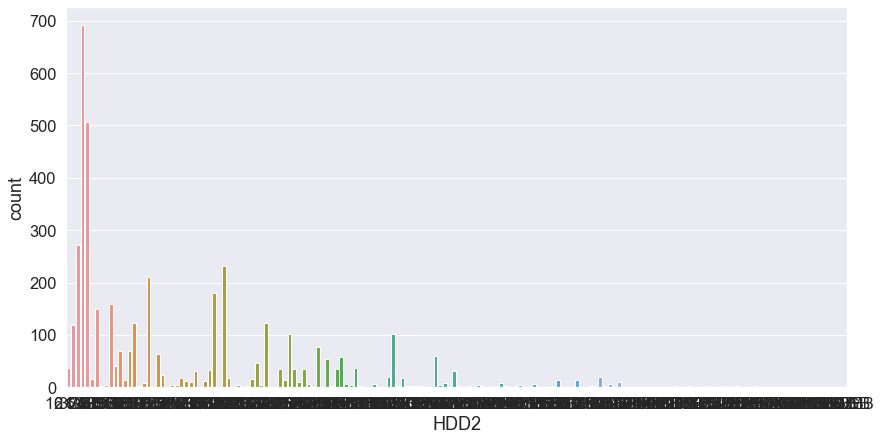

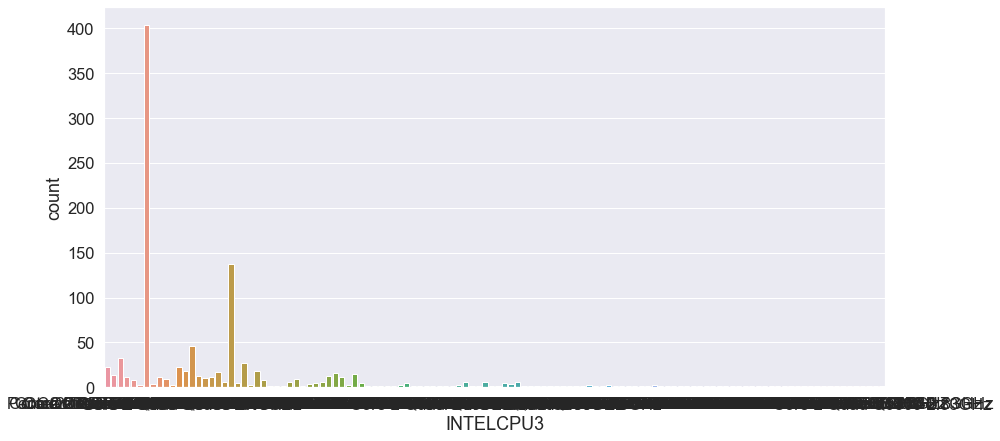

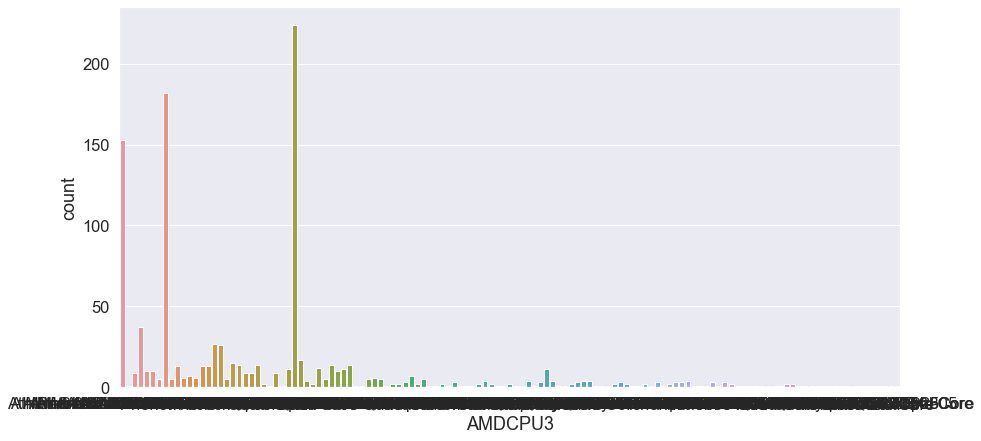

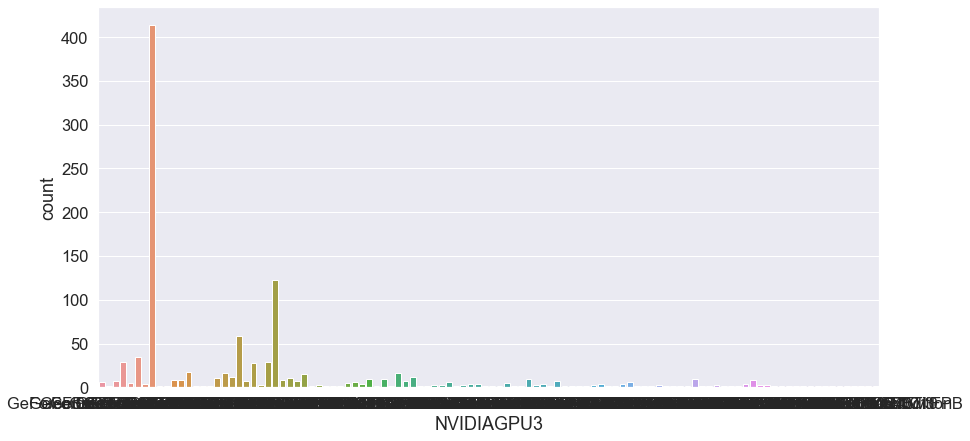

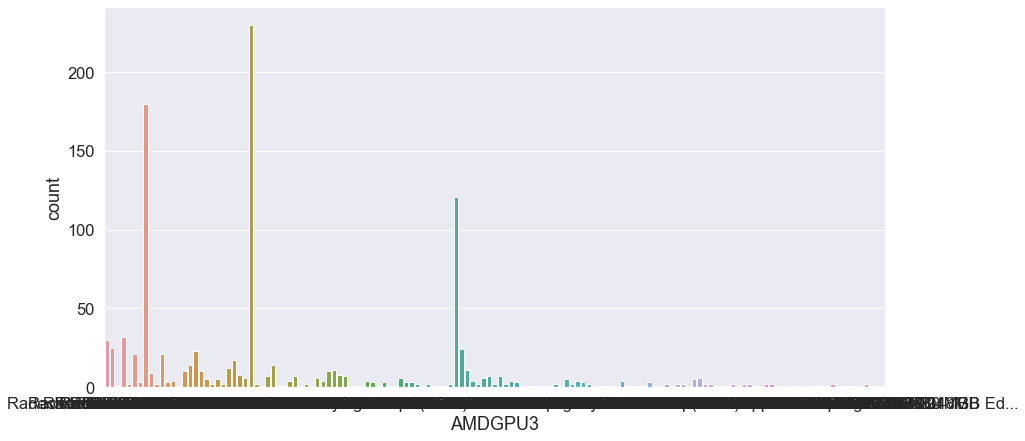

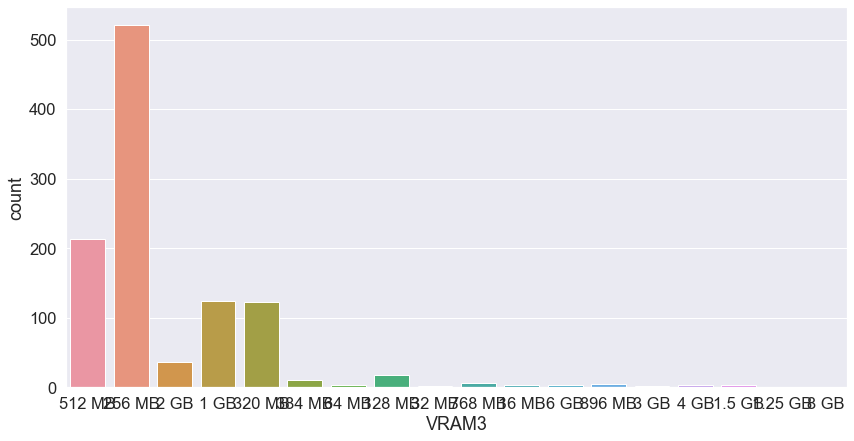

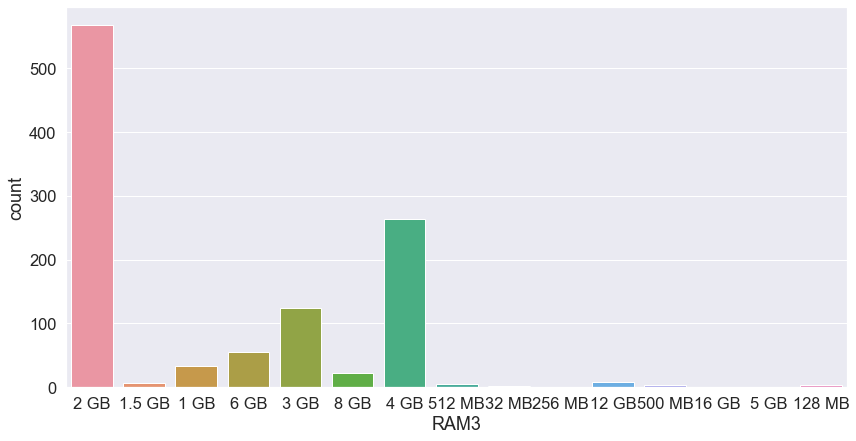

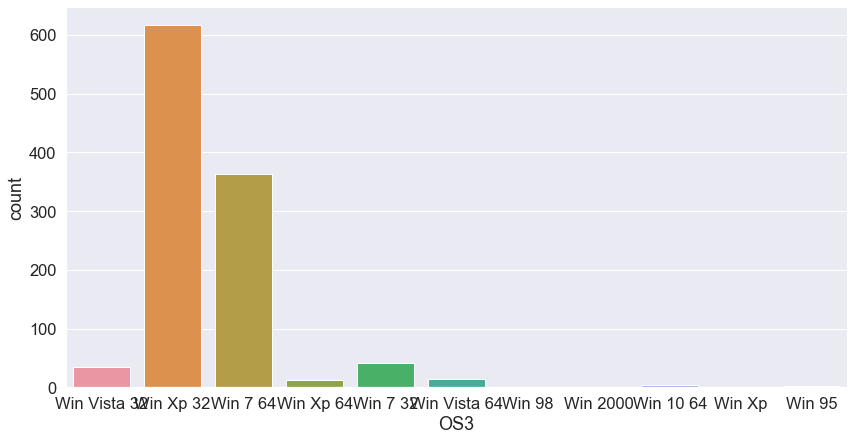

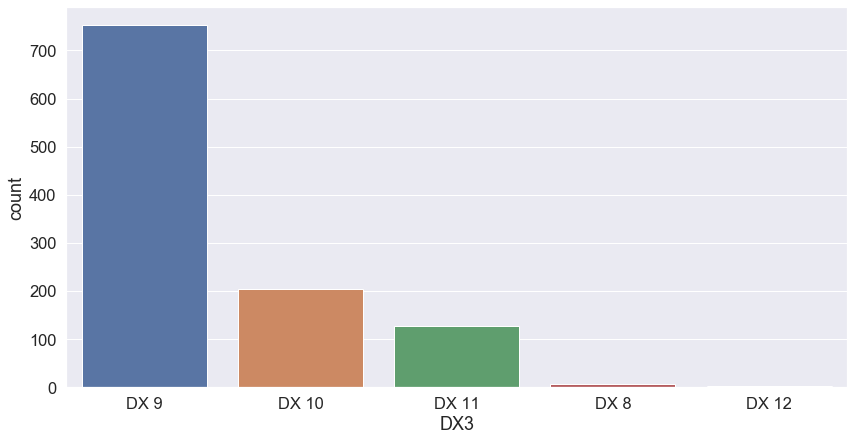

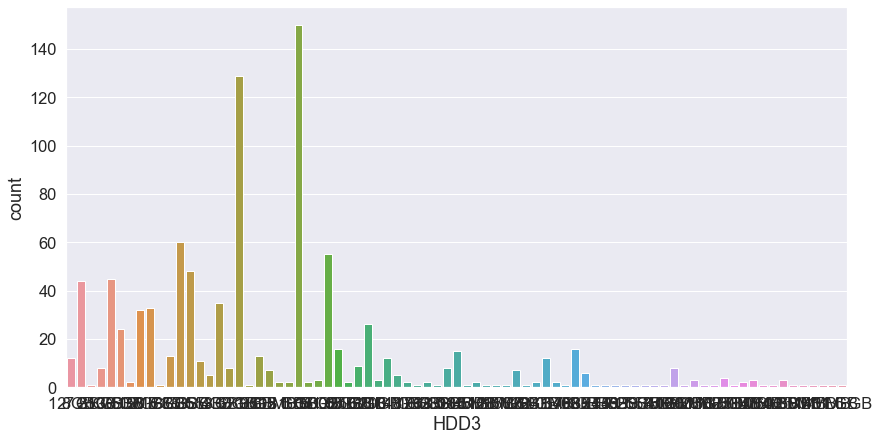

In [1377]:
for col in columns:
    plt.figure(figsize=(14,7))
    #plt.title(col)
    ax = plt.gca()
    sns.countplot(data=df.dropna(subset=[col]), x=col, ax=ax)
    plt.show()

In [1378]:
columns

['INTELCPU1',
 'AMDCPU1',
 'NVIDIAGPU1',
 'AMDGPU1',
 'VRAM1',
 'RAM1',
 'OS1',
 'DX1',
 'HDD1',
 'INTELCPU2',
 'AMDCPU2',
 'NVIDIAGPU2',
 'AMDGPU2',
 'VRAM2',
 'RAM2',
 'OS2',
 'DX2',
 'HDD2',
 'INTELCPU3',
 'AMDCPU3',
 'NVIDIAGPU3',
 'AMDGPU3',
 'VRAM3',
 'RAM3',
 'OS3',
 'DX3',
 'HDD3']

In [1379]:
for col in columns:
    display(col)
    display(df[col].value_counts())

'INTELCPU1'

Pentium 4 1.8GHz            403
Core 2 Duo E4400 2.0GHz     185
Pentium 4 2.0GHz            180
Pentium 4 2.4GHz            136
Core 2 Duo E4300 1.8GHz     109
                           ... 
Core i3-4330TE 2.4GHz         1
Core i5-3450 3.1GHz           1
Celeron D 336                 1
Core 2 Duo E6405 2.13GHz      1
Celeron 430 1.8GHz            1
Name: INTELCPU1, Length: 144, dtype: int64

'AMDCPU1'

Athlon XP 1700+                 420
Athlon 64 X2 Dual Core 4800+    151
Athlon 64 X2 Dual Core 4000+    123
Athlon 64 X2 Dual Core 3600+    117
Athlon XP 2000+                 110
                               ... 
Phenom II X4 40                   1
FX-8150                           1
Phenom II X4 920                  1
Phenom 9600 Quad-Core             1
Phenom 9750 Quad-Core             1
Name: AMDCPU1, Length: 165, dtype: int64

'NVIDIAGPU1'

GeForce 210            433
GeForce 8600 GT         97
GeForce GT 330          93
GeForce 8800 GT         78
GeForce 6600            70
                      ... 
GeForce GTX 660 Ti       1
GeForce 9800 GT 1GB      1
Vanta 16MB               1
Quadro FX 1000           1
GeForce GTX 950 2GB      1
Name: NVIDIAGPU1, Length: 174, dtype: int64

'AMDGPU1'

Radeon X600 Series       426
Radeon HD 3600 Series    102
Radeon HD 2600 XT         80
Radeon X1600              63
Radeon HD 3870            55
                        ... 
Radeon HD 5750 512MB       1
Radeon R7 240 v2 2GB       1
Radeon HD 6570 v2          1
Radeon R9 285 2GB          1
Radeon HD 7670A            1
Name: AMDGPU1, Length: 205, dtype: int64

'VRAM1'

256 MB     696
128 MB     658
512 MB     254
1 GB        85
2 GB        48
64 MB       23
384 MB      16
320 MB      13
896 MB       7
768 MB       4
4 GB         4
1.25 GB      3
32 MB        2
3 GB         2
1.5 GB       2
6 GB         1
16 MB        1
Name: VRAM1, dtype: int64

'RAM1'

1 GB      942
2 GB      753
4 GB      129
512 MB     93
1.5 GB     63
500 MB     49
3 GB       47
8 GB       41
256 MB     28
6 GB       24
128 MB      4
12 GB       1
16 GB       1
2.5 GB      1
Name: RAM1, dtype: int64

'OS1'

Win Xp 32       1796
Win Vista 32     123
Win 7 64         107
Win 7 32          51
Win Vista 64      27
Win Xp 64         21
Win 2000          20
Win 10 64          9
Win Xp             7
Win 98             5
Win 8 64           1
Name: OS1, dtype: int64

'DX1'

DX 9       1889
DX 11       137
DX 10       102
DX 8         16
DX 12         3
DX 7          1
DX 10.1       1
Name: DX1, dtype: int64

'HDD1'

1 GB        293
2 GB        290
3 GB        138
500 MB      112
8 GB        105
           ... 
19 GB         1
1.337 GB      1
54 GB         1
19.5 GB       1
512 MB        1
Name: HDD1, Length: 114, dtype: int64

'INTELCPU2'

Pentium III                       518
Core 2 Duo E4400 2.0GHz           348
Pentium 4 2.0GHz                  314
Pentium 4 3.0GHz                  267
Celeron E1200 Dual-Core 1.6GHz    209
                                 ... 
Atom Z510 1.1GHz                    1
Core 2 Duo P8600 2.4GHz             1
Core i7-4770S 4-Core 3.1GHz         1
Pentium M 1.8GHz                    1
Celeron M 560 2.13GHz               1
Name: INTELCPU2, Length: 226, dtype: int64

'AMDCPU2'

Athlon MP                       526
Athlon 64 X2 Dual Core 4000+    300
Athlon 64 X2 Dual Core 4200+    286
Athlon XP 1500+                 213
Athlon XP 2000+                 174
                               ... 
Ryzen 5 2600                      1
APU A10-5800K Quad-Core           1
Athlon X2 340                     1
K6 233MHz                         1
APU A10-6700T Quad-Core           1
Name: AMDCPU2, Length: 262, dtype: int64

'NVIDIAGPU2'

GeForce 6200 LE       276
GeForce GT 340        226
GeForce FX 5200       207
GeForce GT 230        201
GeForce GTS 250       160
                     ... 
GeForce GTS 450 v2      1
GeForce GT 610          1
GeForce 8400M GS        1
GeForce GTX 590         1
GeForce 3 Ti 500        1
Name: NVIDIAGPU2, Length: 208, dtype: int64

'AMDGPU2'

Radeon Xpress 1200 Series                 468
Radeon X1900 GT                           224
Radeon HD 6550D                           186
Radeon HD 6670                            158
Radeon 7000 64mb                          120
                                         ... 
Radeon R7 260X v2                           1
Intel 845GV                                 1
Radeon R9 FURY 4GB                          1
Radeon HD 2400 XT                           1
Radeon HD 7750 PowerColor 1GB Editi...      1
Name: AMDGPU2, Length: 260, dtype: int64

'VRAM2'

256 MB     1520
512 MB      872
128 MB      825
1 GB        504
64 MB       271
2 GB         95
32 MB        92
16 MB        68
320 MB       57
896 MB       44
384 MB       40
768 MB       39
4 GB         33
3 GB         11
1.5 GB       10
6 GB          9
8 GB          7
1.25 GB       5
Name: VRAM2, dtype: int64

'RAM2'

2 GB      1277
1 GB       748
4 GB       704
512 MB     527
256 MB     367
3 GB       198
128 MB     152
8 GB       137
32 MB       80
1.5 GB      77
64 MB       77
500 MB      52
6 GB        37
16 GB       28
16 MB       13
2.5 GB       6
12 GB        4
320 MB       3
384 MB       2
640 MB       2
768 MB       2
96 MB        1
400 MB       1
10 MB        1
1 MB         1
250 MB       1
100 MB       1
Name: RAM2, dtype: int64

'OS2'

Win Xp 32       1656
Win 7 64         692
Win 7 32         175
Win Vista 32      96
Win 10 64         48
Win Vista 64      35
Win 98            33
Win Xp 64         33
Win 2000          30
Win 8 64          19
Win 95            14
Win Xp             6
Win 10 32          2
Win 7              2
Name: OS2, dtype: int64

'DX2'

DX 9       3349
DX 11       330
DX 8        325
DX 10       284
DX 12         9
DX 11.1       2
DX 6          2
DX 7          2
DX 5          1
DX 8.1        1
Name: DX2, dtype: int64

'HDD2'

1 GB       692
2 GB       506
3 GB       271
500 MB     231
4 GB       211
          ... 
474 MB       1
28 GB        1
345 MB       1
110 MB       1
1.35 GB      1
Name: HDD2, Length: 166, dtype: int64

'INTELCPU3'

Pentium 4 3.46GHz                 404
Core 2 Duo E6550 2.33GHz          137
Core 2 Quad Q6400 2.13GHz          46
Core 2 Duo E4400 2.0GHz            33
Core 2 Duo E6700 2.66GHz           27
                                 ... 
Pentium Dual Core E2180 2.0GHz      1
Core i5-2400S 2.5GHz                1
Celeron 1.66GHz                     1
Core i3-2100T 2.5GHz                1
Core i5-2400 3.1GHz                 1
Name: INTELCPU3, Length: 120, dtype: int64

'AMDCPU3'

Athlon 64 4000+                 224
Athlon 64 3800+                 182
Athlon 64 X2 Dual Core 5600+    153
Athlon 64 X2 Dual Core 4000+     37
Phenom 9600 Quad-Core            27
                               ... 
Athlon II X4 635                  1
FX-8120                           1
Phenom II X6 1075T                1
Athlon II X3 450                  1
Ryzen R5 1400                     1
Name: AMDCPU3, Length: 127, dtype: int64

'NVIDIAGPU3'

GeForce GT 120           414
GeForce 8800 GTS         123
GeForce GTS 450           59
GeForce GT 240            35
GeForce GTS 250           29
                        ... 
GeForce GTX 660 Ti         1
GeForce 6200               1
GeForce FX 5600 XT         1
GeForce FX 5600 Ultra      1
GeForce 210                1
Name: NVIDIAGPU3, Length: 108, dtype: int64

'AMDGPU3'

Radeon HD 2600 XT          230
Radeon HD 4550             180
Radeon HD 5670 1GB DDR3    121
Radeon HD 6450              32
Radeon HD 3870              30
                          ... 
Radeon HD 4200               1
Radeon HD 5770 512MB         1
Radeon HD 7670               1
Radeon 9200 Series           1
Radeon X1600                 1
Name: AMDGPU3, Length: 141, dtype: int64

'VRAM3'

256 MB     521
512 MB     213
1 GB       124
320 MB     123
2 GB        36
128 MB      18
384 MB      10
768 MB       6
896 MB       5
6 GB         4
4 GB         4
64 MB        3
16 MB        3
1.5 GB       3
32 MB        2
3 GB         2
8 GB         1
1.25 GB      1
Name: VRAM3, dtype: int64

'RAM3'

2 GB      568
4 GB      263
3 GB      125
6 GB       56
1 GB       34
8 GB       23
12 GB       9
1.5 GB      7
512 MB      5
500 MB      3
128 MB      3
32 MB       2
5 GB        1
256 MB      1
16 GB       1
Name: RAM3, dtype: int64

'OS3'

Win Xp 32       617
Win 7 64        364
Win 7 32         42
Win Vista 32     34
Win Vista 64     14
Win Xp 64        12
Win 10 64         4
Win 95            2
Win 98            1
Win Xp            1
Win 2000          1
Name: OS3, dtype: int64

'DX3'

DX 9     753
DX 10    205
DX 11    128
DX 8       6
DX 12      2
Name: DX3, dtype: int64

'HDD3'

1 GB      150
2 GB      129
3 GB       60
500 MB     55
5 GB       48
         ... 
8.5 GB      1
11 GB       1
255 MB      1
17 GB       1
512 MB      1
Name: HDD3, Length: 79, dtype: int64

In [1380]:
df.columns

Index(['ID', 'Title', 'Release', 'Genres', 'Theme', 'INTELCPU1', 'AMDCPU1',
       'NVIDIAGPU1', 'AMDGPU1', 'VRAM1', 'RAM1', 'OS1', 'DX1', 'HDD1',
       'INTELCPU2', 'AMDCPU2', 'NVIDIAGPU2', 'AMDGPU2', 'VRAM2', 'RAM2', 'OS2',
       'DX2', 'HDD2', 'INTELCPU3', 'AMDCPU3', 'NVIDIAGPU3', 'AMDGPU3', 'VRAM3',
       'RAM3', 'OS3', 'DX3', 'HDD3', 'INTELCPU4', 'AMDCPU4', 'NVIDIAGPU4',
       'AMDGPU4', 'VRAM4', 'RAM4', 'OS4', 'DX4', 'HDD4', 'req4type',
       'hdd_minimal_gb', 'hdd_rec_gb', 'ram_minimal_gb', 'ram_rec_gb',
       'vram_minimal_gb', 'vram_rec_gb', 'min_intel_cpu', 'rec_intel_cpu',
       'min_amd_cpu', 'rec_amd_cpu'],
      dtype='object')

In [1381]:
numeric_cols = ['hdd_minimal_gb', 'hdd_rec_gb',
       'ram_minimal_gb', 'ram_rec_gb', 'vram_minimal_gb', 'vram_rec_gb']

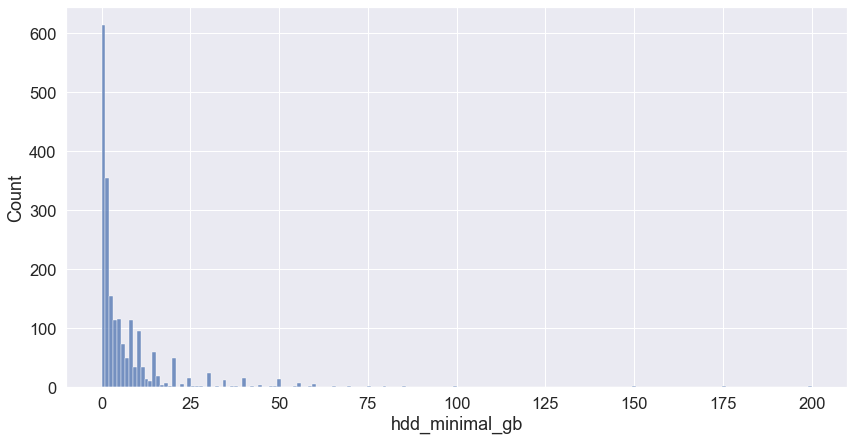

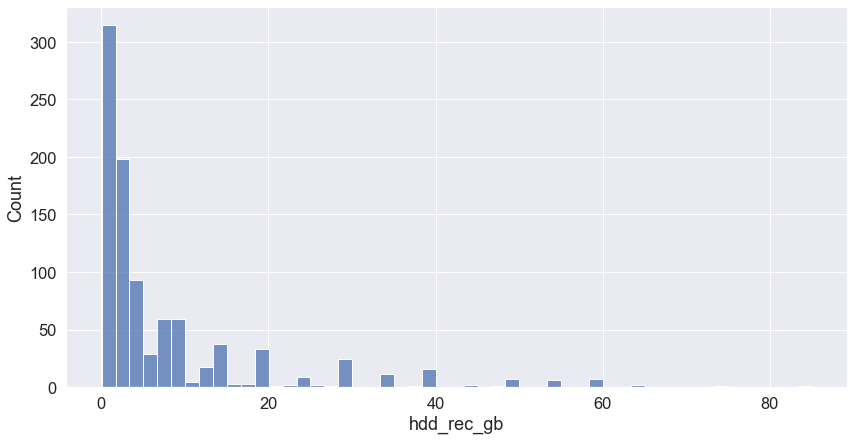

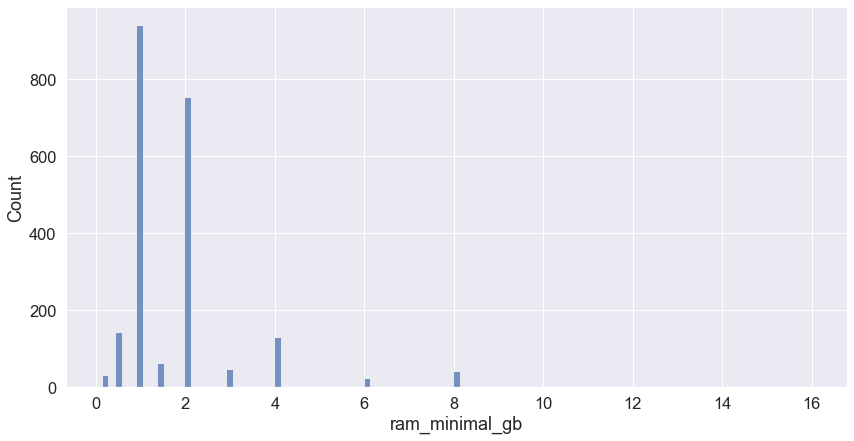

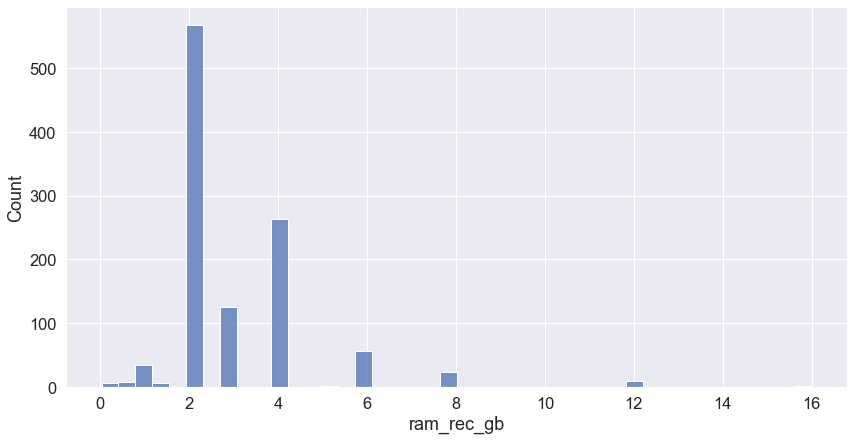

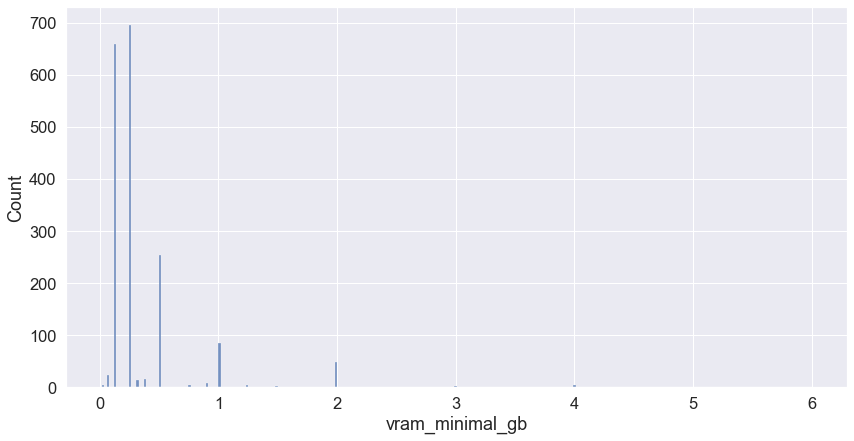

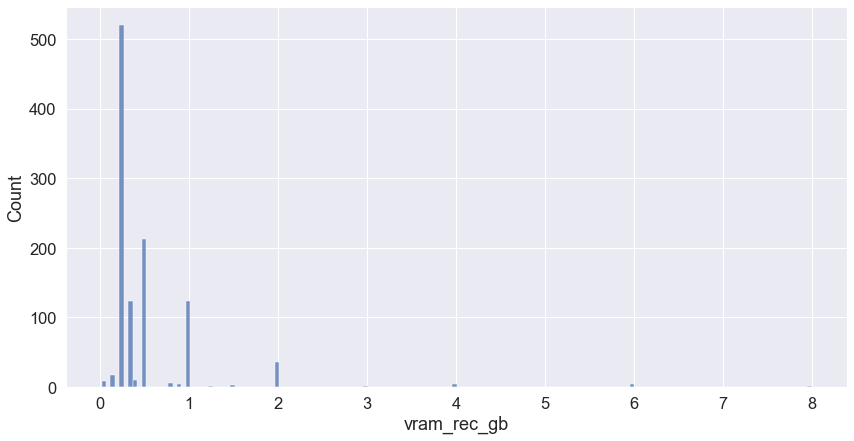

In [1382]:
for col in numeric_cols:
    plt.figure(figsize=(14,7))
    sns.histplot(data=df, x=col)

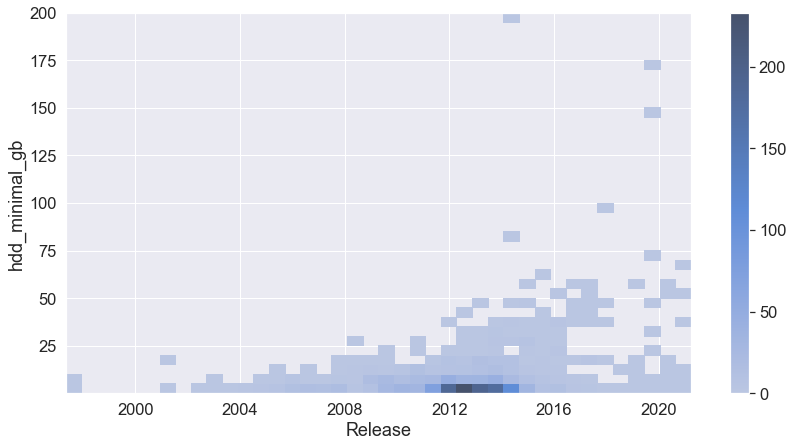

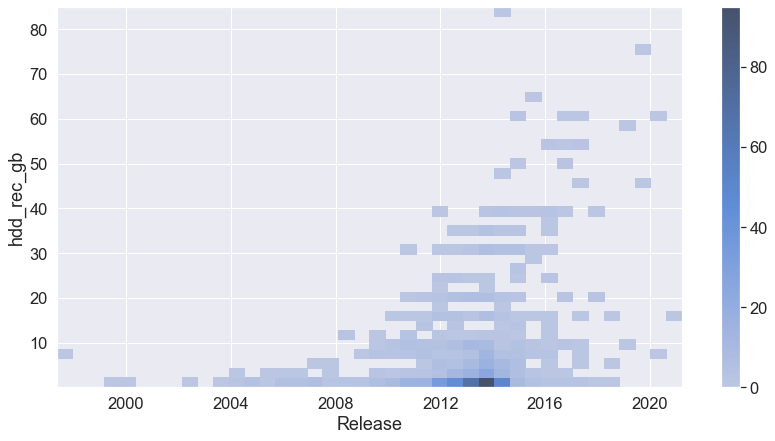

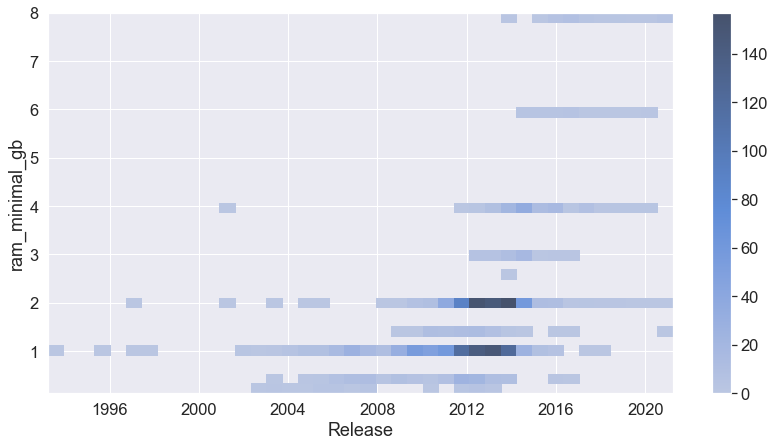

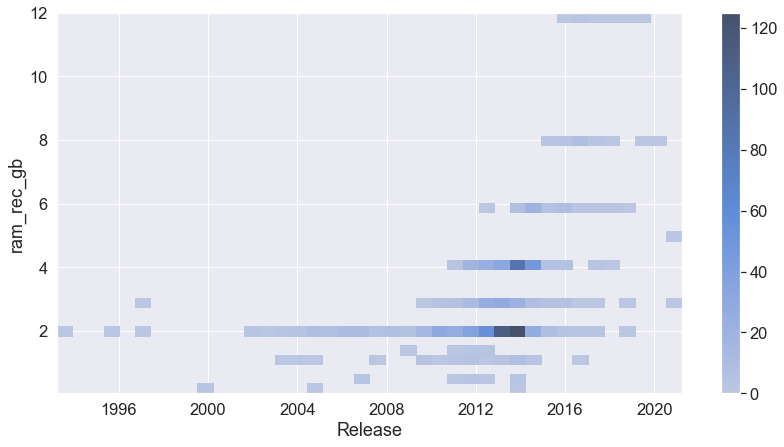

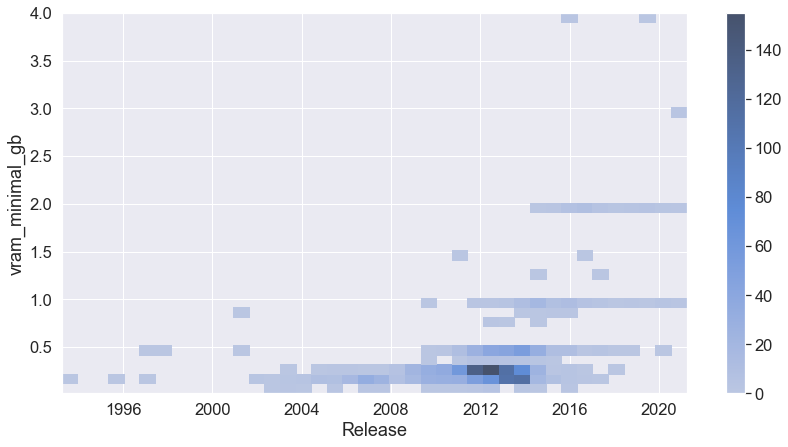

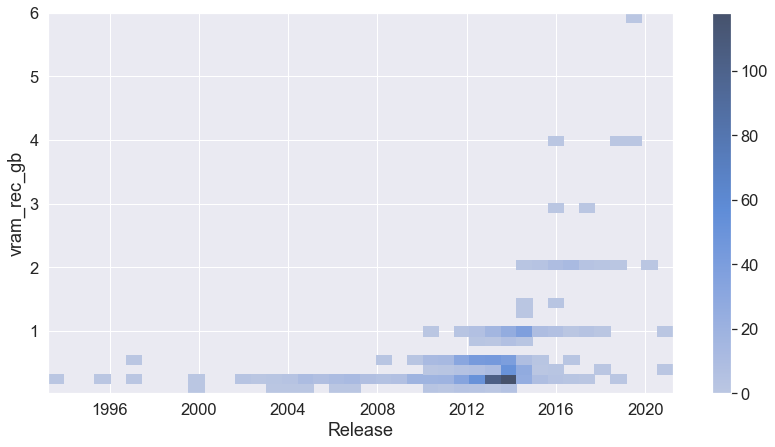

In [1383]:
for col in numeric_cols:
    plt.figure(figsize=(14,7))
    sns.histplot(data=df.dropna(subset=[col]), y=col, x='Release',bins=40,cbar=True)

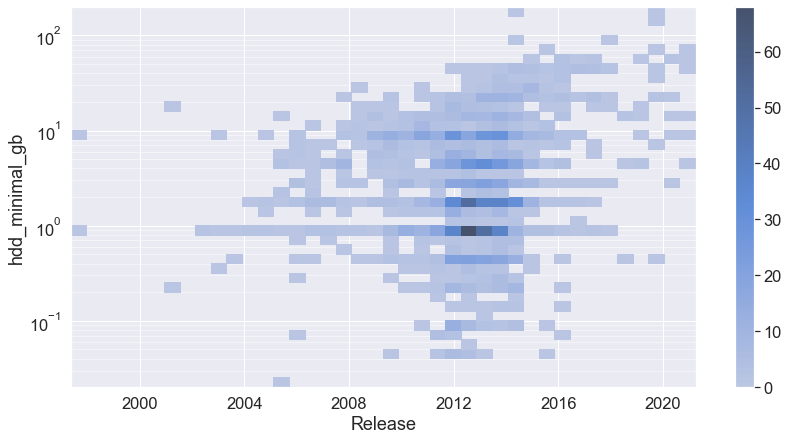

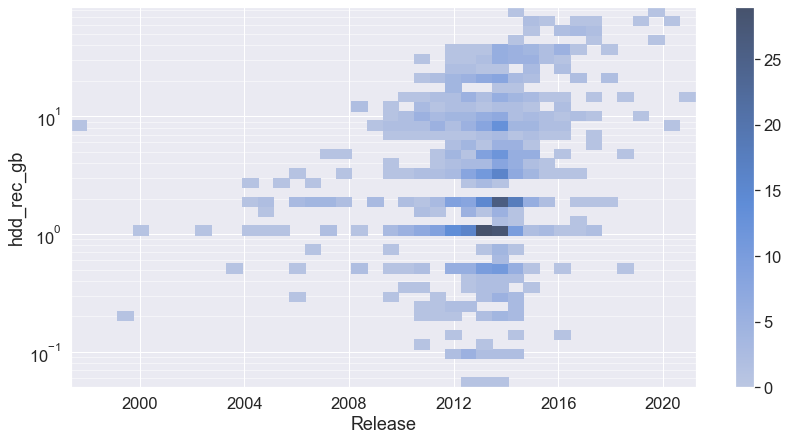

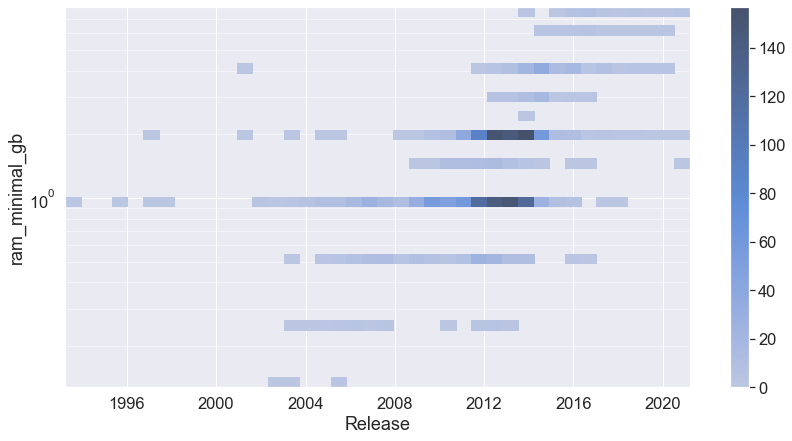

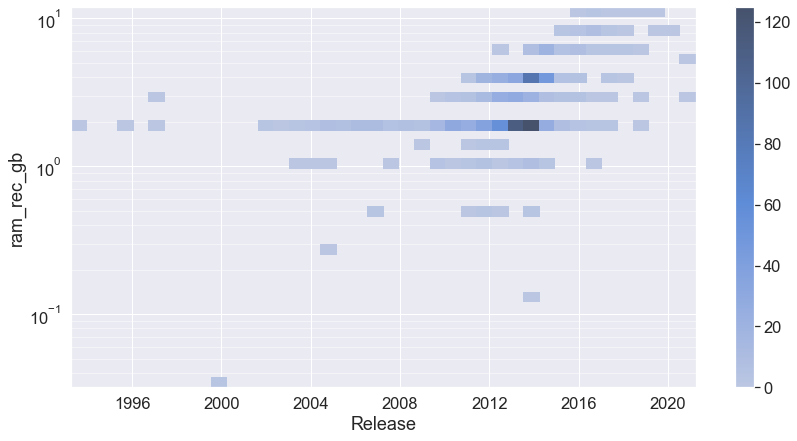

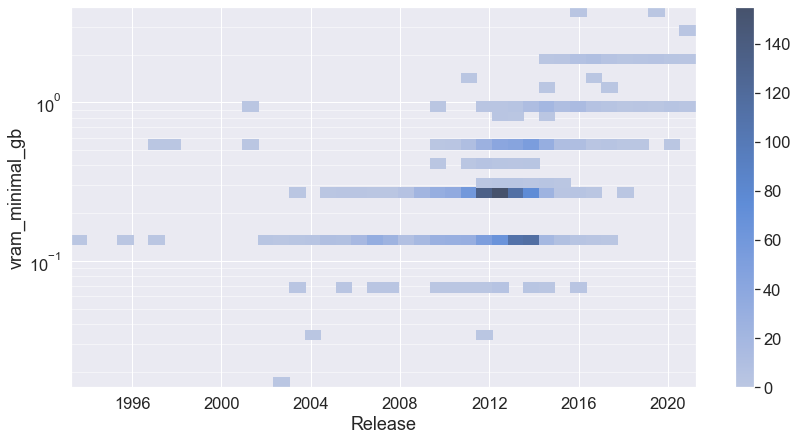

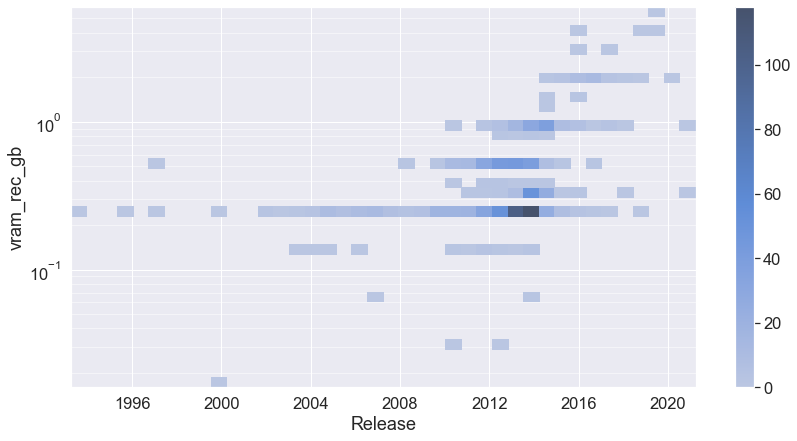

In [1384]:
for col in numeric_cols:
    plt.figure(figsize=(14,7))
    sns.histplot(data=df.dropna(subset=[col]), y=col, x='Release',bins=40,cbar=True,log_scale=(False, True))
    ax = plt.gca()
    #ax.set(yscale="log")
    
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)

OS1
OS2
DX1
DX2


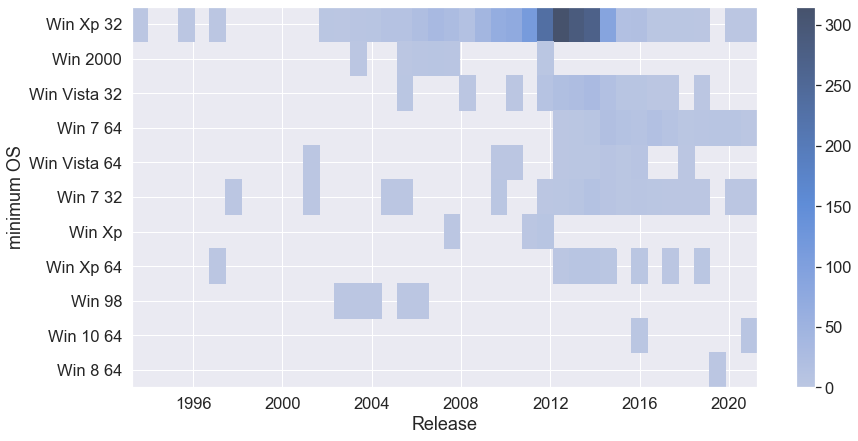

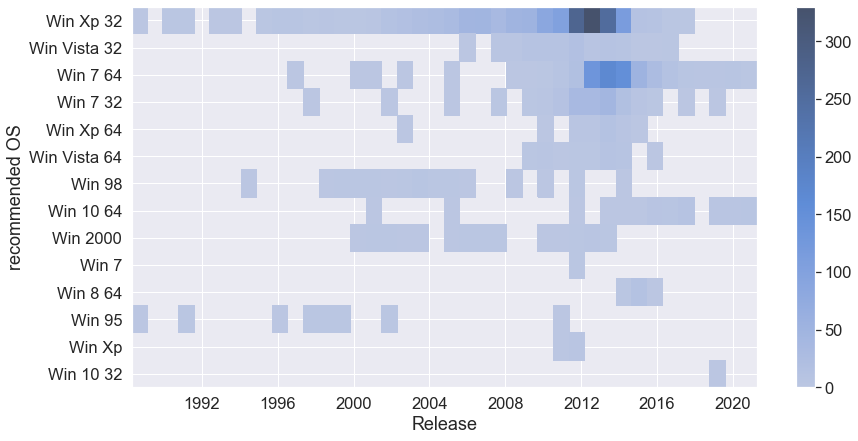

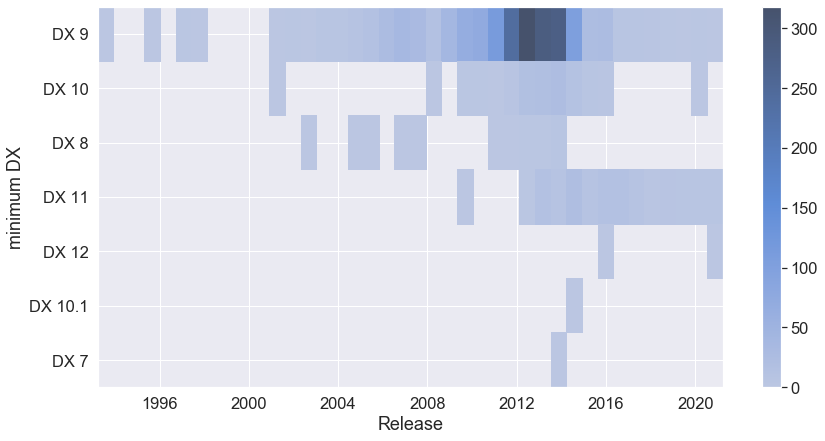

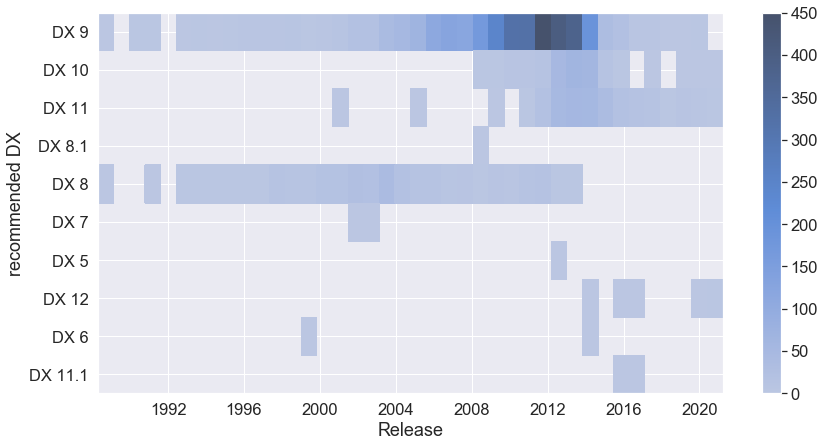

In [1385]:
os_dict={'OS1': 'minimum OS', 'OS2': 'recommended OS', 'DX1': 'minimum DX', 'DX2': 'recommended DX'}
for col in ['OS1', 'OS2', 'DX1', 'DX2']:
    print(col)
    plt.figure(figsize=(14,7))
    plt.ylabel(os_dict[col])
    sns.histplot(data=df.dropna(subset=[col]), y=col, x='Release',bins=40,cbar=True)

In [1386]:
df['OS1'].dropna().value_counts()

Win Xp 32       1796
Win Vista 32     123
Win 7 64         107
Win 7 32          51
Win Vista 64      27
Win Xp 64         21
Win 2000          20
Win 10 64          9
Win Xp             7
Win 98             5
Win 8 64           1
Name: OS1, dtype: int64

## some specific queries

In [1387]:
df.sort_values(by='ram_minimal_gb', ascending=False).head(10) \
    .replace(' System Requirements', '')[['ID','Title']+numeric_cols]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,ID,Title,hdd_minimal_gb,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb
5196,5490,Star Citizen System Requirements,100.0,NaN,16.0,NaN,4.0,NaN
1020,8856,Portal 3 System Requirements,50.0,50.0,12.0,12.0,6.0,8.0
1309,9229,Kingdom Come: Deliverance System Requirements,40.0,40.0,8.0,12.0,2.0,2.0
1367,9339,Red Dead Redemption 2 System Requirements,150.0,NaN,8.0,NaN,2.0,NaN
801,8607,EVE: Valkyrie System Requirements,13.0,13.0,8.0,8.0,4.0,4.0
392,8082,Kingdom Hearts III System Requirements,5.0,15.0,8.0,5.0,2.0,1.0
4722,5013,Fallout 4 System Requirements,30.0,30.0,8.0,8.0,1.0,2.0
391,8081,Star Wars: Battlefront System Requirements,40.0,40.0,8.0,12.0,2.0,2.0
389,8078,Sunset Overdrive System Requirements,55.0,55.0,8.0,16.0,2.0,4.0
13,17043,Dishonored II System Requirements,60.0,60.0,8.0,8.0,2.0,2.0


In [1388]:
df.sort_values(by='hdd_minimal_gb', ascending=False).head(10) \
    .replace(' System Requirements', '')[['Title']+numeric_cols]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Title,hdd_minimal_gb,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb
1403,Little Racers STREET System Requirements,200.0,NaN,2.0,4.0,NaN,0.32
138,Call of Duty: Modern Warfare System Requirements,175.0,45.0,8.0,12.0,2.000,6.00
1367,Red Dead Redemption 2 System Requirements,150.0,NaN,8.0,NaN,2.000,NaN
5196,Star Citizen System Requirements,100.0,NaN,16.0,NaN,4.000,NaN
4421,Final Fantasy XV System Requirements,100.0,NaN,8.0,NaN,2.000,NaN
3460,The Elder Scrolls Online System Requirements,85.0,85.0,4.0,6.0,1.000,1.00
3504,LA Noire 2 System Requirements,80.0,NaN,8.0,NaN,2.000,NaN
5119,Borderlands 3 System Requirements,75.0,75.0,6.0,8.0,2.000,4.00
4330,Cyberpunk 2077 System Requirements,70.0,NaN,8.0,NaN,3.000,NaN
1069,Grand Theft Auto V System Requirements,65.0,65.0,4.0,6.0,0.512,1.00


In [1389]:
df.sort_values(by='vram_minimal_gb', ascending=False).head(10) \
    .replace(' System Requirements', '')[['Title']+numeric_cols]

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\missing.py:49: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


,Title,hdd_minimal_gb,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb
1020,Portal 3 System Requirements,50.0,50.0,12.0,12.0,6.0,8.0
801,EVE: Valkyrie System Requirements,13.0,13.0,8.0,8.0,4.0,4.0
3156,S.T.A.L.K.E.R. Online System Requirements,7.0,NaN,8.0,NaN,4.0,NaN
98,The Gallery - Episode 1: Call of the Starseed ...,15.0,NaN,8.0,NaN,4.0,NaN
5196,Star Citizen System Requirements,100.0,NaN,16.0,NaN,4.0,NaN
4330,Cyberpunk 2077 System Requirements,70.0,NaN,8.0,NaN,3.0,NaN
360,Serious Sam 4 System Requirements,40.0,NaN,8.0,NaN,3.0,NaN
1145,Battlefield 1 System Requirements,50.0,50.0,8.0,12.0,2.0,2.0
889,Space Hulk: Deathwing System Requirements,40.0,40.0,8.0,8.0,2.0,2.0
551,Evil Genius 2: World Domination System Require...,15.0,NaN,8.0,NaN,2.0,NaN


In [1390]:
df[df['OS2'] == 'Win 98'].sort_values(by='Release').head(10)[['ID', 'Title', 'Release', 'OS2']]

,ID,Title,Release,OS2
1234,1480,Star Wars: TIE Fighter System Requirements,1994-07-01,Win 98
3081,3347,Sanitarium System Requirements,1998-04-30,Win 98
5189,5483,Kingpin: Life Of Crime System Requirements,1999-06-30,Win 98
1673,1930,Septerra Core: Legacy of the Creator System Re...,1999-10-31,Win 98
1807,2064,Gorky 17 System Requirements,1999-11-30,Win 98
4684,4974,Toy Story 2: Buzz Lightyear to the Rescue Syst...,1999-11-30,Win 98
2713,2976,Cabelas GrandSlam Hunting: North American 29 S...,2000-06-10,Win 98
3319,3591,Pharaoh: Cleopatra System Requirements,2000-09-30,Win 98
4584,4870,Donald Duck: Goin Quackers System Requirements,2000-10-19,Win 98
4138,4420,Stronghold System Requirements,2001-10-19,Win 98


In [1391]:
df[df['Release'].dt.year == 2020][['Title']+columns]

,Title,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,RAM1,OS1,DX1,HDD1,...,HDD2,INTELCPU3,AMDCPU3,NVIDIAGPU3,AMDGPU3,VRAM3,RAM3,OS3,DX3,HDD3
3476,Halo 3 System Requirements,Core i7-975 Quad 3.33GHz Extreme,APU A12-9800 4-Core 3.8GHz,GeForce GTS 450 v4,Radeon R7 240 2GB,1 GB,2 GB,Win 7 64,DX 11,55 GB,...,55 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
3662,Black Mesa System Requirements,Core 2 Duo E4700 2.6GHz,Athlon 64 X2 Dual Core 5600+,GeForce GTX 750,Radeon R7 360 v3,1 GB,6 GB,Win 7 32,DX 9,20 GB,...,20 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4113,Halo 4 System Requirements,Core i7-975 Quad 3.33GHz Extreme,APU A12-9800 4-Core 3.8GHz,GeForce GTS 450,Radeon R7 250 1GB,1 GB,2 GB,Win 7 32,DX 11,55 GB,...,55 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
4233,Mount and Blade 2: Bannerlord System Requirements,Core i3-8100 4-Core 3.6GHz,Ryzen R3 1200,GeForce GTX 660 v2,Radeon HD 7850,2 GB,6 GB,Win Xp 32,DX 11,60 GB,...,60 GB,Core i7-4770K 4-Core 3.5GHz,Ryzen R5 1500X,GeForce GTX 960 2GB,Radeon R9 280,2 GB,8 GB,Win 7 64,DX 11,60 GB
4330,Cyberpunk 2077 System Requirements,Core i5-3570K 3.4GHz,FX-8310,GeForce GTX 780,Radeon RX 470 4GB,3 GB,8 GB,Win 7 64,DX 12,70 GB,...,70 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
214,Galaxy in Turmoil System Requirements,Core i5-650 3.2GHz,Athlon II X4 610e,GeForce GT 640 v3,Radeon HD 5570 1024MB,1 GB,4 GB,Win 7 64,DX 11,3 GB,...,3 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
445,The Wonderful 101 System Requirements,Core i3-7100 2-Core 3.9GHz,FX-8100,GeForce GT 630,Radeon HD 4650,512 MB,4 GB,Win 7 64,DX 9,15 GB,...,15 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
597,Phantasy Star Online 2 System Requirements,Core 2 Duo E6300 1.86GHz,Athlon 64 X2 Dual Core 4800+,GeForce 7800 GT,Radeon HD 3600 Series,NaN,1.5 GB,Win Xp 32,DX 9,8 GB,...,8 GB,Core 2 Duo E6550 2.33GHz,Athlon 64 X2 Dual Core 5600+,GeForce 8800 GTS,Radeon HD 5670 1GB DDR3,320 MB,3 GB,Win 7 64,DX 10,8 GB
234,Stone Rage System Requirements,Core i5-2300 2.8GHz,FX-6300,GeForce GTX 750,Radeon HD 7790,1 GB,8 GB,Win 10 64,DX 11,8 GB,...,8 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
360,Serious Sam 4 System Requirements,Core i5-2400S 2.5GHz,Phenom II X4 905e,GeForce GTX 780,Radeon HD 7950,3 GB,8 GB,Win 10 64,DX 11,40 GB,...,40 GB,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [1392]:
df.columns

Index(['ID', 'Title', 'Release', 'Genres', 'Theme', 'INTELCPU1', 'AMDCPU1',
       'NVIDIAGPU1', 'AMDGPU1', 'VRAM1', 'RAM1', 'OS1', 'DX1', 'HDD1',
       'INTELCPU2', 'AMDCPU2', 'NVIDIAGPU2', 'AMDGPU2', 'VRAM2', 'RAM2', 'OS2',
       'DX2', 'HDD2', 'INTELCPU3', 'AMDCPU3', 'NVIDIAGPU3', 'AMDGPU3', 'VRAM3',
       'RAM3', 'OS3', 'DX3', 'HDD3', 'INTELCPU4', 'AMDCPU4', 'NVIDIAGPU4',
       'AMDGPU4', 'VRAM4', 'RAM4', 'OS4', 'DX4', 'HDD4', 'req4type',
       'hdd_minimal_gb', 'hdd_rec_gb', 'ram_minimal_gb', 'ram_rec_gb',
       'vram_minimal_gb', 'vram_rec_gb', 'min_intel_cpu', 'rec_intel_cpu',
       'min_amd_cpu', 'rec_amd_cpu'],
      dtype='object')

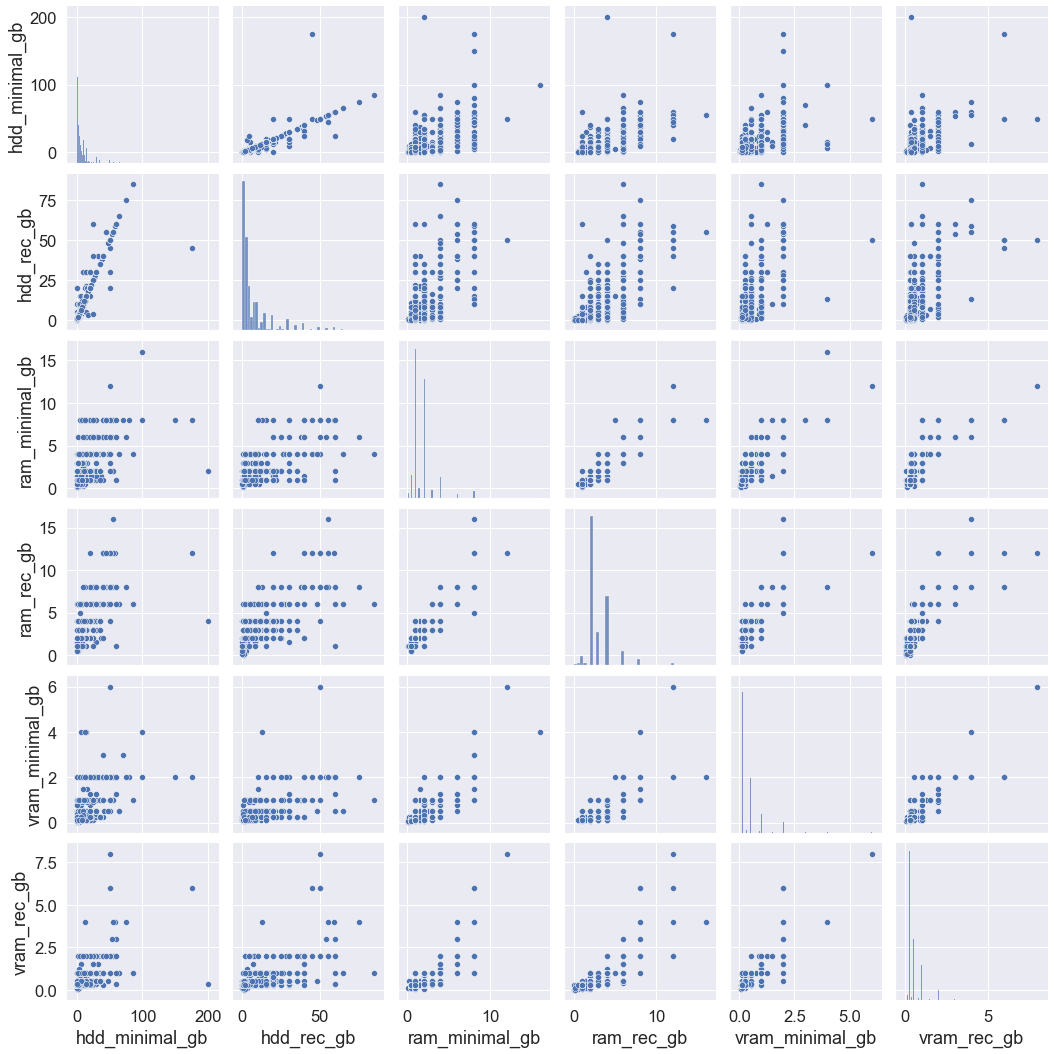

In [1393]:
sns.pairplot(df[['Release', 'INTELCPU1', 'AMDCPU1',
       'NVIDIAGPU1', 'AMDGPU1', 'OS1', 'DX1',
       'INTELCPU2', 'AMDCPU2', 'NVIDIAGPU2', 'AMDGPU2', 'OS2',
       'DX2',
       'hdd_minimal_gb', 'hdd_rec_gb', 'ram_minimal_gb', 'ram_rec_gb',
       'vram_minimal_gb', 'vram_rec_gb']])

## using cpu and gpu specs to compare with performance

### using boinc gflops estimate

using CPU FLOPS from https://asteroidsathome.net/boinc/cpu_list.php using https://www.convertcsv.com/html-table-to-csv.htm

In [962]:
df_cpu = pd.read_csv('cpu_gflops.csv')
df_cpu['CPU model'].fillna('', inplace=True)
df_cpu.drop(df_cpu.index.max(), inplace=True)
df_cpu['GFLOPs/computer'] = df_cpu['GFLOPs/computer'].astype(np.float)
df_cpu.drop(df_cpu.index.max(), inplace=True)

In [963]:
df_cpu

,CPU model,Number of computers,Avg. cores/computer,GFLOPS/core,GFLOPs/computer
0,Intel(R) Core(TM) i7-5775R CPU @ 3.30GHz [x86 ...,12,8.00,6.42,51.33
1,Intel(R) Core(TM) i5-5675R CPU @ 3.10GHz [x86 ...,32,4.00,6.37,25.48
2,Intel(R) Core(TM) i5-9600K CPU @ 3.70GHz [x86 ...,12,6.00,6.28,37.70
3,Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz [x86 ...,14,16.00,6.27,100.32
4,Intel(R) Core(TM) i9-9900K CPU @ 3.60GHz [x86 ...,11,16.00,6.26,100.20
...,...,...,...,...,...
2275,ARMv6-compatible processor rev 7 (v6l) [Impl 0...,120,1.00,0.45,0.45
2276,ARMv7 Processor rev 2 (v7l) @1200MHz,14,1.07,0.36,0.39
2277,ARMv7 Processor rev 2 (v7l) @1000MHz,29,1.14,0.36,0.41
2278,ARMv6-compatible processor rev 7 (v6l),448,1.00,0.32,0.32


In [964]:
df_cpu.describe()

,Avg. cores/computer,GFLOPS/core,GFLOPs/computer
count,2280.000000,2280.000000,2280.000000
mean,5.801118,2.709110,18.441592
std,7.895570,1.066174,31.620650
min,1.000000,0.220000,0.220000
25%,2.000000,1.920000,4.480000
50%,4.000000,2.640000,9.710000
75%,6.700000,3.350000,19.810000
max,128.000000,6.420000,655.770000


In [965]:
df_intel_cpu = df_cpu[df_cpu['CPU model'].str.contains('Intel')].copy()
df_intel_cpu['model'] = df_intel_cpu['CPU model'].str.replace('(R)', '',regex=False).str.replace('(TM)', '',regex=False).str.replace('Intel ', '', regex=False).str.replace('CPU ', '', regex=False).str.replace('@ ', '', regex=False).str.replace(' \[.*\]$', '')
df_intel_cpu['model']

0       Core i7-5775R 3.30GHz
1       Core i5-5675R 3.10GHz
2       Core i5-9600K 3.70GHz
3       Core i9-9900K 3.60GHz
4       Core i9-9900K 3.60GHz
                ...          
2265         Atom 230 1.60GHz
2266        Atom N455 1.66GHz
2269        Atom N550 1.50GHz
2270        Atom N550 1.50GHz
2271        Atom Z520 1.33GHz
Name: model, Length: 1549, dtype: object

In [966]:
df_intel_cpu = df_intel_cpu.groupby('model').mean()
df_intel_cpu

,Avg. cores/computer,GFLOPS/core,GFLOPs/computer
model,,,
Atom 230 1.60GHz,2.000000,0.660000,1.330
Atom 330 1.60GHz,3.980000,0.730000,2.915
Atom C2750 2.40GHz,5.200000,1.890000,9.830
Atom D2500 1.86GHz,2.000000,0.800000,1.600
Atom D2550 1.86GHz,3.915000,0.770000,3.025
...,...,...,...
Xeon X5677 3.47GHz,13.820000,3.550000,49.020
Xeon X5680 3.33GHz,18.463333,3.783333,70.470
Xeon X5690 3.47GHz,20.006667,3.883333,78.130


In [967]:
df_intel_cpu[df_intel_cpu.index.str.contains('Pentium 4')]

,Avg. cores/computer,GFLOPS/core,GFLOPs/computer
model,,,
Mobile Pentium 4 3.06GHz,2.000000,1.650000,3.300000
Pentium 4 1.50GHz,1.000000,0.820000,0.820000
Pentium 4 1.60GHz,1.000000,0.810000,0.810000
Pentium 4 1.70GHz,1.000000,0.840000,0.840000
Pentium 4 1.80GHz,1.000000,0.873333,0.873333
Pentium 4 2.00GHz,1.000000,0.960000,0.960000
Pentium 4 2.40GHz,1.086667,1.170000,1.273333
Pentium 4 2.53GHz,1.000000,1.190000,1.190000
Pentium 4 2.60GHz,1.640000,1.270000,2.070000


In [968]:
df['INTELCPU1'].dropna().head()

0        Pentium 4 2.4GHz
2        Pentium 4 1.8GHz
5    Pentium D 820 2.8GHz
6       Pentium 4 2.66GHz
7        Pentium 4 1.8GHz
Name: INTELCPU1, dtype: object

In [969]:
string = 'Pentium 4 2.4GHz'

In [970]:
m = re.search('(.*) ([\d]+)\.(\d+)GHz$', string)
string,m[1],m[2],m[3],f'{m[1]} {m[2]}.'+((m[3]+'0') if len(m[3]) == 1 else m[3])+'GHz'

('Pentium 4 2.4GHz', 'Pentium 4', '2', '4', 'Pentium 4 2.40GHz')

In [971]:
df['INTELCPU1'].dropna().iloc[1]

'Pentium 4 1.8GHz'

In [972]:
df_cpu[df_cpu['CPU model'] == df['INTELCPU1'].dropna().iloc[1]]

,CPU model,Number of computers,Avg. cores/computer,GFLOPS/core,GFLOPs/computer


In [973]:
df_cpu[df_cpu['CPU model'] == '1.8GHz']

,CPU model,Number of computers,Avg. cores/computer,GFLOPS/core,GFLOPs/computer


In [974]:
df['min_intel_cpu'].notna().sum()

2119

In [975]:
len(set(df['min_intel_cpu']).difference(set(df_intel_cpu.index)))

69

In [976]:
set(df['min_intel_cpu']).difference(set(df_intel_cpu.index))

{<NA>,
 'Celeron 1.00GHz',
 'Celeron 1.40GHz',
 'Celeron 1.66GHz',
 'Celeron D 310',
 'Celeron D 315',
 'Celeron D 336',
 'Celeron D 352',
 'Celeron E1600 2.40GHz',
 'Celeron G550T 2.20GHz',
 'Core i3-2115C 2.00GHz',
 'Core i3-3250T 3.00GHz',
 'Core i3-4330TE 2.40GHz',
 'Core i3-530 2.90GHz',
 'Core i3-540 3.06GHz',
 'Core i3-550 3.20GHz',
 'Core i3-560 3.30GHz',
 'Core i3-6300T 3.30GHz',
 'Core i3-7100 2-Core 3.90GHz',
 'Core i3-8100 4-Core 3.60GHz',
 'Core i5-650 3.20GHz',
 'Core i5-660 3.33GHz',
 'Core i5-750 2.66GHz',
 'Core i5-750S 2.40GHz',
 'Core i5-760 2.80GHz',
 'Core i5-8600 6-Core 3.10GHz',
 'Core i7-860S Quad 2.53GHz',
 'Core i7-975 Quad 3.33GHz Extreme',
 'Core2 Duo E4300 1.80GHz',
 'Core2 Duo E6300 1.86GHz',
 'Core2 Duo E6305 1.86GHz',
 'Core2 Duo E6320 1.86GHz',
 'Core2 Duo E6400 2.13GHz',
 'Core2 Duo E6405 2.13GHz',
 'Core2 Duo E6540 2.33GHz',
 'Core2 Duo E6600 2.40GHz',
 'Core2 Duo E6700 2.66GHz',
 'Core2 Duo E8190 2.66GHz',
 'Core2 Quad Q6400 2.13GHz',
 'Pentium 4 1.3

In [978]:
df['min_intel_cpu'].isin(set(df['min_intel_cpu']).difference(set(df_intel_cpu.index)).difference(set([pd.NA]))).sum()

542

In [979]:
df.merge(df_intel_cpu, left_on='min_intel_cpu', right_index=True)

,ID,Title,Release,Genres,Theme,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,...,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb,min_intel_cpu,rec_intel_cpu,Avg. cores/computer,GFLOPS/core,GFLOPs/computer
0,12,Mass Effect System Requirements,2008-06-06,"['Action', 'RPG', 'Sci fi ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2400+,GeForce 8600 GS,Radeon X1300 256MB,256 MB,...,NaN,1.000,NaN,0.256,NaN,Pentium 4 2.40GHz,Pentium 4 2.66GHz,1.086667,1.170,1.273333
8,20,Bioshock System Requirements,2007-08-24,"['1st Person', 'RPG', 'Shooter', 'Horror ']",<NA>,Pentium 4 2.4GHz,Sempron 2500+,GeForce 6600 GT,Radeon X1300 256MB,128 MB,...,NaN,1.000,NaN,0.128,NaN,Pentium 4 2.40GHz,Pentium E2140 1.60GHz,1.086667,1.170,1.273333
13,25,Fallout 3 System Requirements,2008-10-31,"['Action', 'RPG', 'Sci fi ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2400+,GeForce 6800 GT,Radeon HD 2400 Series,256 MB,...,NaN,1.000,NaN,0.256,NaN,Pentium 4 2.40GHz,Core2 Duo E4300 1.80GHz,1.086667,1.170,1.273333
27,42,S.T.A.L.K.E.R.: Clear Sky System Requirements,2008-09-05,"['Shooter', 'Horror ']",<NA>,Pentium 4 2.4GHz,Athlon 64 2800+,GeForce FX 5700,Radeon 9600 Series,128 MB,...,NaN,0.512,NaN,0.128,NaN,Pentium 4 2.40GHz,Core2 Duo E6400 2.13GHz,1.086667,1.170,1.273333
64,81,Command & Conquer: Red Alert 3 System Requirem...,2008-10-31,"['Strategy', 'War ']",<NA>,Pentium 4 2.4GHz,Athlon XP 3000+,GeForce 6800 XT,Radeon X800 Pro,256 MB,...,NaN,1.000,NaN,0.256,NaN,Pentium 4 2.40GHz,Core2 Duo E4500 2.20GHz,1.086667,1.170,1.273333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,8856,Portal 3 System Requirements,NaT,"['Platformer', 'Puzzler', 'Strategy', 'Sci fi ']",<NA>,Core i5-7500 3.4GHz,Ryzen R5 1600,GeForce GTX 1060,Radeon RX 580 8GB,6 GB,...,50.0,12.000,12.0,6.000,8.0,Core i5-7500 3.40GHz,Core i7-6700K 4-Core 4.00GHz,4.000000,4.745,18.975000
1145,9002,Battlefield 1 System Requirements,2016-10-18,"['1st Person', 'Action', 'Shooter', 'War ']",<NA>,Core i5-6600K 3.5GHz,FX-6350,GeForce GTX 660,Radeon HD 7850,2 GB,...,50.0,8.000,12.0,2.000,2.0,Core i5-6600K 3.50GHz,Core i7-4790 4-Core 3.60GHz,4.890000,4.620,22.580000
1348,9316,Call of Cthulhu System Requirements,2018-10-30,"['Adventure', 'Fantasy', 'Horror ']",<NA>,Core i5-3450 3.1GHz,FX-6300,GeForce GTX 660,Radeon HD 7870,2 GB,...,NaN,8.000,NaN,2.000,NaN,Core i5-3450 3.10GHz,Core i7-3820 4-Core 3.60GHz,4.000000,3.740,14.950000
1360,9330,Hearts of Iron IV System Requirements,2016-06-06,"['Management', 'Strategy', 'War ']",<NA>,Core 2 Quad Q9400 2.66GHz,Athlon II X4 650,GeForce GTX 470,Radeon HD 5850 1024MB,1 GB,...,NaN,4.000,NaN,1.000,NaN,Core2 Quad Q9400 2.66GHz,Core i5-750 2.66GHz,3.990000,2.950,11.760000


In [980]:
df['min_intel_cpu']

0             Pentium 4 2.40GHz
1                          <NA>
2             Pentium 4 1.80GHz
3                          <NA>
4                          <NA>
                 ...           
1449          Pentium 4 1.60GHz
1450      Pentium E2140 1.60GHz
1451    Core2 Duo E4600 2.40GHz
1452                       <NA>
1453                       <NA>
Name: min_intel_cpu, Length: 7796, dtype: object

In [981]:
df_intel_cpu[df_intel_cpu.index.str.contains('E7400')].index

Index(['Core2 Duo E7400 2.80GHz'], dtype='object', name='model')

In [982]:
df

,ID,Title,Release,Genres,Theme,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,...,HDD4,req4type,hdd_minimal_gb,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb,min_intel_cpu,rec_intel_cpu
0,12,Mass Effect System Requirements,2008-06-06,"['Action', 'RPG', 'Sci fi ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2400+,GeForce 8600 GS,Radeon X1300 256MB,256 MB,...,<NA>,<NA>,12.0,NaN,1.0,NaN,0.256,NaN,Pentium 4 2.40GHz,Pentium 4 2.66GHz
1,13,Spore System Requirements,2008-09-05,"['Management', 'Strategy', 'Social ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,Pentium 4 2.80GHz
2,14,Sins of a Solar Empire System Requirements,2008-06-20,"['Management', 'Strategy', 'Sci fi ']",<NA>,Pentium 4 1.8GHz,Athlon XP 1800+,GeForce 6600,Radeon 9600 Series,128 MB,...,<NA>,<NA>,3.0,NaN,0.5,NaN,0.128,NaN,Pentium 4 1.80GHz,Core2 Duo E4500 2.20GHz
3,15,Galactic Civilizations II: Dread Lords (1) Sys...,2006-03-03,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,Pentium III
4,16,Galactic Civilizations II: Dark Avatar (2) Sys...,2007-02-14,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,Pentium M 1.80GHz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1449,9441,EvilQuest System Requirements,2014-02-20,"['Action', 'Adventure', 'RPG', 'Fantasy ']",<NA>,Pentium 4 1.6GHz,Athlon XP 2000+,GeForce 210,Radeon X600 Series,128 MB,...,<NA>,<NA>,0.2,NaN,1.0,2.0,0.128,0.256,Pentium 4 1.60GHz,Core2 Duo E4400 2.00GHz
1450,9442,Risen 3: Titan Lords System Requirements,2014-08-15,['RPG '],<NA>,Pentium Dual Core E2140 1.60GHz,Athlon 64 X2 Dual Core 3600+,GeForce 8500 GT,Radeon HD 2600 Pro,256 MB,...,<NA>,<NA>,10.0,NaN,2.0,NaN,0.256,NaN,Pentium E2140 1.60GHz,Core i5-655K 3.20GHz
1451,9443,Batman: Arkham Origins - Cold Cold Heart Syste...,2014-04-22,"['Action', 'Stealth', 'Crime ']",<NA>,Core 2 Duo E4600 2.4GHz,Athlon 64 X2 Dual Core 4800+,<NA>,Radeon HD 3850,NaN,...,<NA>,<NA>,15.0,15.0,2.0,4.0,NaN,1.000,Core2 Duo E4600 2.40GHz,Core i5-750 2.66GHz
1452,9807,Ultionus System Requirements,2014-02-25,"['Action', 'Adventure', 'Fantasy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,Pentium 4 1.60GHz


In [983]:
df_intel_cpu

,Avg. cores/computer,GFLOPS/core,GFLOPs/computer
model,,,
Atom 230 1.60GHz,2.000000,0.660000,1.330
Atom 330 1.60GHz,3.980000,0.730000,2.915
Atom C2750 2.40GHz,5.200000,1.890000,9.830
Atom D2500 1.86GHz,2.000000,0.800000,1.600
Atom D2550 1.86GHz,3.915000,0.770000,3.025
...,...,...,...
Xeon X5677 3.47GHz,13.820000,3.550000,49.020
Xeon X5680 3.33GHz,18.463333,3.783333,70.470
Xeon X5690 3.47GHz,20.006667,3.883333,78.130


In [984]:
df[df['min_intel_cpu'] == 'Celeron E1600 Dual-Core 2.40GHz']

,ID,Title,Release,Genres,Theme,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,...,HDD4,req4type,hdd_minimal_gb,hdd_rec_gb,ram_minimal_gb,ram_rec_gb,vram_minimal_gb,vram_rec_gb,min_intel_cpu,rec_intel_cpu


### using passmark

passmark was obtained from https://www.videocardbenchmark.net/gpu_list.php and https://www.cpubenchmark.net/cpu_list.php using https://www.convertcsv.com/html-table-to-csv.htm

In [1191]:
df_cpu = pd.read_csv('cpu_passmark.csv')
#df_cpu['CPU Name'].fillna('', inplace=True)
df_cpu['CPU Mark'] = df_cpu['CPU Mark (higher is better)'].str.replace(',','',regex=False).astype(np.float)

In [1192]:
df_cpu

,CPU Name,CPU Mark (higher is better),Rank (lower is better),CPU Value (higher is better),Price (USD),CPU Mark
0,AArch64 rev 0 (aarch64),"1,952",1743,NaN,NaN,1952.0
1,AArch64 rev 1 (aarch64),"2,279",1570,NaN,NaN,2279.0
2,AArch64 rev 2 (aarch64),"2,137",1654,NaN,NaN,2137.0
3,AArch64 rev 4 (aarch64),"1,664",1911,NaN,NaN,1664.0
4,AC8257V/WAB,693,2655,NaN,NaN,693.0
...,...,...,...,...,...,...
3575,[Dual CPU] Intel Xeon X5680 @ 3.33GHz,"11,982",152,40.49,$295.96,11982.0
3576,[Dual CPU] Intel Xeon X5687 @ 3.60GHz,"9,145",185,30.49,$299.90*,9145.0
3577,[Dual CPU] Intel Xeon X5690 @ 3.47GHz,"12,589",147,24.21,$519.96,12589.0
3578,[Quad CPU] Intel Xeon X7350 @ 2.93GHz,"7,818",198,54.30,$143.96*,7818.0


In [1193]:
df_cpu.describe()

,Rank (lower is better),CPU Value (higher is better),CPU Mark
count,3580.000000,2008.000000,3580.000000
mean,1545.115922,29.949631,6029.630447
std,1004.042577,33.078426,9629.486482
min,1.000000,0.220000,77.000000
25%,630.750000,10.742500,960.500000
50%,1525.500000,21.110000,2362.000000
75%,2420.250000,36.532500,6919.000000
max,3315.000000,350.410000,95937.000000


In [1194]:
df_cpu.describe(include=np.object)

,CPU Name,CPU Mark (higher is better),Price (USD)
count,3580,3580,2008
unique,3580,2893,1520
top,Intel Core m3-6Y30 @ 0.90GHz,375,$250.00*
freq,1,5,12


In [1195]:
df_cpu[df_cpu['CPU Name'].str.contains('Pentium 4')]

,CPU Name,CPU Mark (higher is better),Rank (lower is better),CPU Value (higher is better),Price (USD),CPU Mark
2251,Intel Pentium 4 1.50GHz,86,3310,NaN,NaN,86.0
2252,Intel Pentium 4 1.60GHz,84,3311,NaN,NaN,84.0
2253,Intel Pentium 4 1.70GHz,86,3309,NaN,NaN,86.0
2254,Intel Pentium 4 1.80GHz,115,3292,NaN,NaN,115.0
2255,Intel Pentium 4 1.90GHz,104,3300,NaN,NaN,104.0
2256,Intel Pentium 4 1300MHz,77,3315,NaN,NaN,77.0
2257,Intel Pentium 4 1400MHz,83,3312,NaN,NaN,83.0
2258,Intel Pentium 4 1500MHz,81,3313,NaN,NaN,81.0
2259,Intel Pentium 4 1700MHz,100,3303,NaN,NaN,100.0
2260,Intel Pentium 4 1800MHz,114,3294,NaN,NaN,114.0


In [1196]:
df_intel_cpu = df_cpu[df_cpu['CPU Name'].str.contains('Intel')].copy()
df_intel_cpu['model'] = df_intel_cpu['CPU Name'].str.replace('Intel ', '', regex=False).str.replace('@ ', '', regex=False)
df_intel_cpu['model']

1087                          2.80GHz
1088                 Atom 230 1.60GHz
1089                 Atom 330 1.60GHz
1090               Atom C2338 1.74GHz
1091               Atom C2358 1.74GHz
                    ...              
3575    [Dual CPU] Xeon X5680 3.33GHz
3576    [Dual CPU] Xeon X5687 3.60GHz
3577    [Dual CPU] Xeon X5690 3.47GHz
3578    [Quad CPU] Xeon X7350 2.93GHz
3579    [Dual CPU] Xeon X7550 2.00GHz
Name: model, Length: 2202, dtype: object

In [1197]:
df_intel_cpu[df_intel_cpu['model'].str.contains('E1600')]

,CPU Name,CPU Mark (higher is better),Rank (lower is better),CPU Value (higher is better),Price (USD),CPU Mark,model
1255,Intel Celeron E1600 @ 2.40GHz,712,2631,NaN,NaN,712.0,Celeron E1600 2.40GHz


In [1294]:
len(set(df['min_intel_cpu']).difference(set(df_intel_cpu['model'])))

37

In [1295]:
set(df['min_intel_cpu']).difference(set(df_intel_cpu['model']))

{<NA>,
 'Celeron 1.00GHz',
 'Celeron 1.40GHz',
 'Celeron 1.66GHz',
 'Celeron D 310',
 'Celeron D 315',
 'Celeron D 336',
 'Celeron D 352',
 'Core i3-2115C 2.00GHz',
 'Core i3-530 2.90GHz',
 'Core i3-540 3.06GHz',
 'Core i3-560 3.30GHz',
 'Core i3-7100 2-Core 3.90GHz',
 'Core i3-8100 4-Core 3.60GHz',
 'Core i5-750 2.66GHz',
 'Core i5-750S 2.40GHz',
 'Core i5-8600 6-Core 3.10GHz',
 'Core i7-860S Quad 2.53GHz',
 'Core i7-975 Quad 3.33GHz Extreme',
 'Core2 Duo E6305 1.86GHz',
 'Core2 Duo E6405 2.13GHz',
 'Core2 Duo E8190 2.66GHz',
 'Core2 Quad Q6400 2.13GHz',
 'Pentium 4 1.30GHz',
 'Pentium 4 1.40GHz',
 'Pentium 4 505-505J 2.66GHz',
 'Pentium 4 HT 517',
 'Pentium D 805 2.67GHz',
 'Pentium D 820 2.80GHz',
 'Pentium D 840 3.20GHz',
 'Pentium D 920 2.80GHz',
 'Pentium D 945 3.40GHz',
 'Pentium E6500K 2.93GHz',
 'Pentium III',
 'Pentium III 1133MHz',
 'Pentium III 1200Mhz',
 'Pentium III 600MHz'}

In [1296]:
# 37 non-matched cpus is low enough, let's see how many games are affected
df['min_intel_cpu'].isin(set(df['min_intel_cpu']).difference(set(df_intel_cpu['model'])).difference(set([pd.NA]))).sum()

161

In [1297]:
# 161 games, that's ok, 542 games was not matched when using boinc

In [1298]:
df['min_intel_cpu'].notna().sum()

2120

In [1320]:
# and now amd
df_amd_cpu = df_cpu[df_cpu['CPU Name'].str.contains('AMD')].copy()
df_amd_cpu['model'] = df_amd_cpu['CPU Name'].str.replace('AMD ', '', regex=False).str.replace('@ ', '', regex=False).str.replace(' Dual-Core', '', regex=False).str.replace(' Dual Core', '', regex=False) \
    .str.replace(' X2', '', regex=False).str.replace(' Quad-Core', '', regex=False).str.replace(' Six-Core', '', regex=False).str.replace(' Eight-Core', '', regex=False).str.replace(' Quad Core', '', regex=False) \
    .str.replace('A10-5800K APU', 'APU A10-5800K', regex=False).str.replace('A4-3400 APU', 'APU A4-3400', regex=False).str.replace('A6-3620 APU', 'APU A6-3620', regex=False).str.replace('A6-7400K APU', 'APU A6-7400K', regex=False) \
    .str.replace('A8-7600 APU', 'APU A8-7600', regex=False)
df_amd_cpu['model']

5                            3015e
6                            3020e
7              A10 Micro-6700T APU
8                A10 PRO-7350B APU
9                A10 PRO-7800B APU
                   ...            
3347       [Dual CPU] Opteron 6380
3348    [Dual CPU] Opteron 6386 SE
3349       [Quad CPU] Opteron 8356
3350    [Dual CPU] Opteron 8439 SE
3351        [Quad CPU] Opteron 885
Name: model, Length: 1096, dtype: object

In [1321]:
df[df['AMDCPU1'].notna()]['AMDCPU1']

0                    Athlon XP 2400+
2                    Athlon XP 1800+
5       Athlon 64 X2 Dual Core 4400+
6                    Athlon XP 2700+
7                    Athlon XP 1700+
                    ...             
7790                 Athlon XP 1700+
7791                 Athlon XP 2000+
7792    Athlon 64 X2 Dual Core 3600+
7793    Athlon 64 X2 Dual Core 4800+
7796    Athlon 64 X2 Dual Core 3800+
Name: AMDCPU1, Length: 2118, dtype: object

In [1322]:
df_amd_cpu[df_amd_cpu['model'].str.contains('5800K')]

,CPU Name,CPU Mark (higher is better),Rank (lower is better),CPU Value (higher is better),Price (USD),CPU Mark,model
19,AMD A10-5800K APU,"2,924",1351,10.36,$282.24*,2924.0,APU A10-5800K


In [1323]:
len(set(df['min_amd_cpu']).difference(set(df_amd_cpu['model'])))

17

In [1324]:
set(df['min_amd_cpu']).difference(set(df_amd_cpu['model']))

{<NA>,
 'APU A12-9800 4-Core 3.80GHz',
 'Athlon 64 BE-2400',
 'Athlon 64 FX-53',
 'Athlon II 450',
 'Athlon II X4 6400e',
 'Athlon MP',
 'Athlon MP 1900+',
 'Athlon X4 730',
 'Athlon XP 3500+',
 'Duron 1.80GHz',
 'Duron 2.00GHz',
 'Opteron 1210',
 'Opteron 265',
 'Opteron 6140',
 'Phenom II X4 40',
 'Sempron 64 LE-1100'}

In [1325]:
# 17 non-matched cpus is low enough, let's see how many games are affected
df['min_amd_cpu'].isin(set(df['min_amd_cpu']).difference(set(df_amd_cpu['model'])).difference(set([pd.NA]))).sum()

99

In [1327]:
df = df.merge(df_amd_cpu[['model', 'CPU Mark']].rename(columns={'CPU Mark':'amd_min_cpu_mark'}), left_on='min_amd_cpu', right_on='model', how='left')

In [1326]:
df = df.merge(df_amd_cpu[['model', 'CPU Mark']].rename(columns={'CPU Mark':'amd_rec_cpu_mark'}), left_on='rec_amd_cpu', right_on='model', how='left')

In [1328]:
df

,ID,Title,Release,Genres,Theme,INTELCPU1,AMDCPU1,NVIDIAGPU1,AMDGPU1,VRAM1,...,model_x,intel_min_cpu_mark,model_y,intel_rec_cpu_mark,min_amd_cpu,rec_amd_cpu,model_x,amd_rec_cpu_mark,model_y,amd_min_cpu_mark
0,12,Mass Effect System Requirements,2008-06-06,"['Action', 'RPG', 'Sci fi ']",<NA>,Pentium 4 2.4GHz,Athlon XP 2400+,GeForce 8600 GS,Radeon X1300 256MB,256 MB,...,Pentium 4 2.40GHz,131.0,Pentium 4 2.66GHz,157.0,Athlon XP 2400+,Athlon 64 3700+,Athlon 64 3700+,394.0,Athlon XP 2400+,234.0
1,13,Spore System Requirements,2008-09-05,"['Management', 'Strategy', 'Social ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,Pentium 4 2.80GHz,230.0,<NA>,Athlon XP 2800+,Athlon XP 2800+,260.0,NaN,NaN
2,14,Sins of a Solar Empire System Requirements,2008-06-20,"['Management', 'Strategy', 'Sci fi ']",<NA>,Pentium 4 1.8GHz,Athlon XP 1800+,GeForce 6600,Radeon 9600 Series,128 MB,...,Pentium 4 1.80GHz,115.0,Core2 Duo E4500 2.20GHz,745.0,Athlon XP 1800+,Athlon 64 4800+,Athlon 64 4800+,704.0,Athlon XP 1800+,195.0
3,15,Galactic Civilizations II: Dread Lords (1) Sys...,2006-03-03,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,NaN,NaN,<NA>,Athlon XP 1500+,Athlon XP 1500+,167.0,NaN,NaN
4,16,Galactic Civilizations II: Dark Avatar (2) Sys...,2007-02-14,"['Management', 'Strategy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,NaN,...,NaN,NaN,Pentium M 1.80GHz,280.0,<NA>,Athlon XP 1800+,Athlon XP 1800+,195.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8563,9807,Ultionus System Requirements,2014-02-25,"['Action', 'Adventure', 'Fantasy', 'Sci fi ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,Pentium 4 1.60GHz,84.0,<NA>,Duron 2.00GHz,NaN,NaN,NaN,NaN
8564,9808,The Yawhg System Requirements,2014-02-27,"['Adventure', 'RPG', 'Fantasy ']",<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,NaN,NaN,Pentium 4 2.00GHz,133.0,<NA>,Duron 2.00GHz,NaN,NaN,NaN,NaN
8565,10193,Flockers System Requirements,2014-05-06,[''],<NA>,Core 2 Duo E6400 2.13GHz,Athlon 64 X2 Dual Core 3800+,GeForce 8600 GTS 512MB,Radeon HD 6450,512 MB,...,Core2 Duo E6400 2.13GHz,795.0,Core2 Duo E8400 3.00GHz,1157.0,Athlon 64 3800+,Phenom II 545,Phenom II 545,1204.0,Athlon 64 3800+,292.0
8566,10193,Flockers System Requirements,2014-05-06,[''],<NA>,Core 2 Duo E6400 2.13GHz,Athlon 64 X2 Dual Core 3800+,GeForce 8600 GTS 512MB,Radeon HD 6450,512 MB,...,Core2 Duo E6400 2.13GHz,795.0,Core2 Duo E8400 3.00GHz,1157.0,Athlon 64 3800+,Phenom II 545,Phenom II 545,1204.0,Athlon 64 3800+,566.0


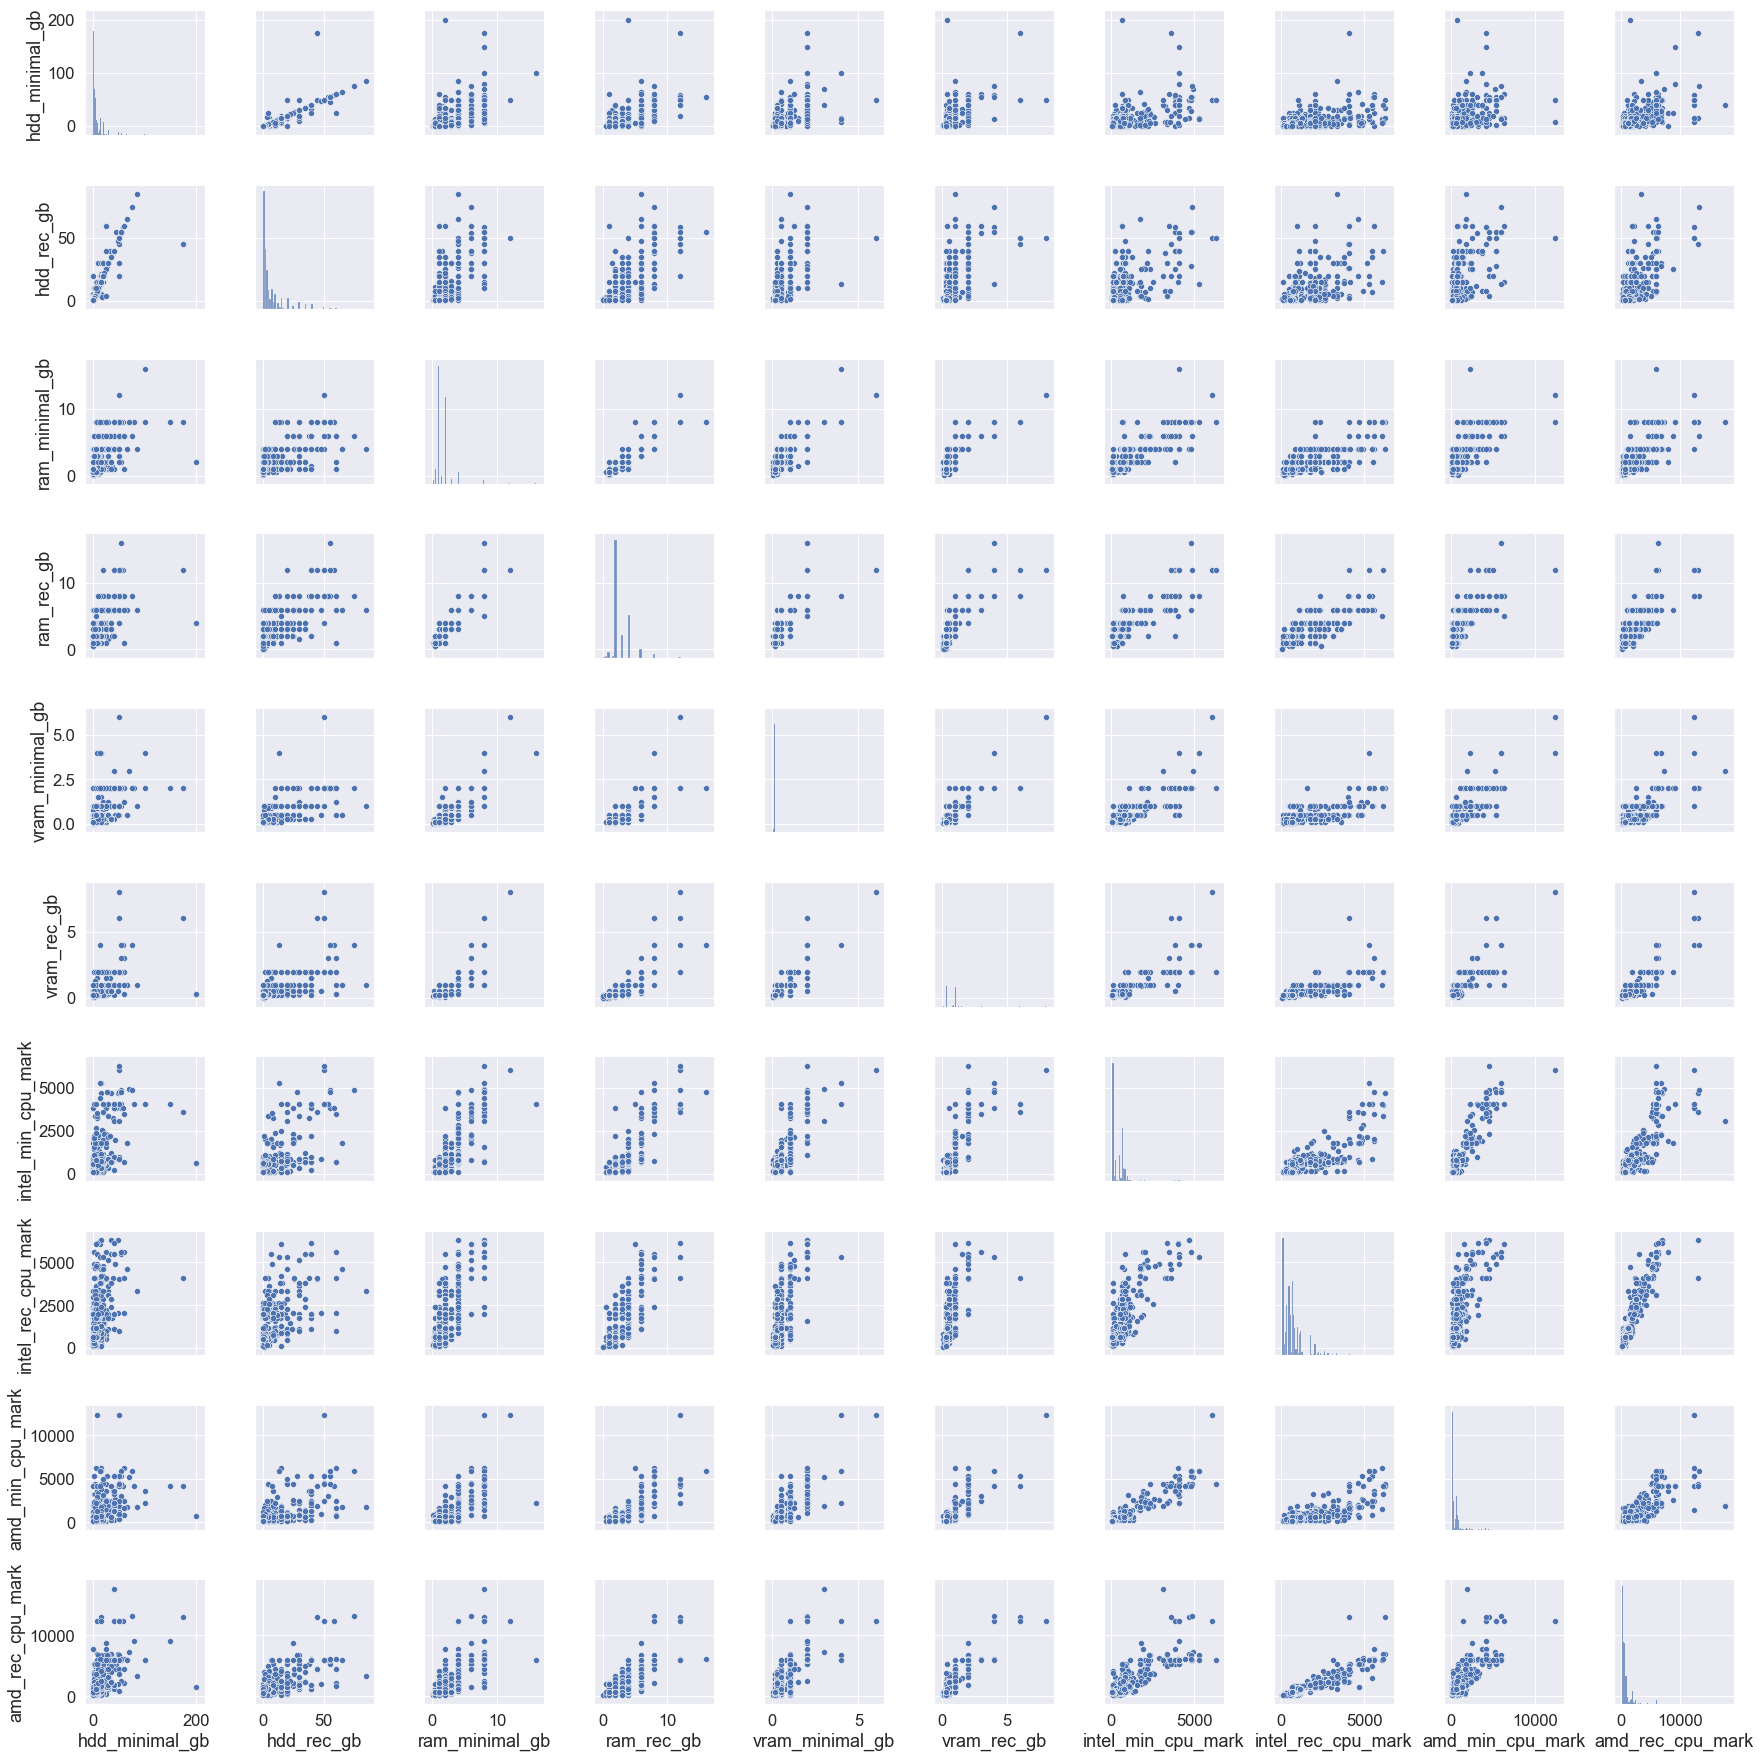

In [1329]:
sns.pairplot(df[['Release', 'INTELCPU1', 'AMDCPU1',
       'NVIDIAGPU1', 'AMDGPU1', 'OS1', 'DX1',
       'INTELCPU2', 'AMDCPU2', 'NVIDIAGPU2', 'AMDGPU2', 'OS2',
       'DX2',
       'hdd_minimal_gb', 'hdd_rec_gb', 'ram_minimal_gb', 'ram_rec_gb',
       'vram_minimal_gb', 'vram_rec_gb', 'intel_min_cpu_mark', 'intel_rec_cpu_mark', 'amd_min_cpu_mark', 'amd_rec_cpu_mark']])

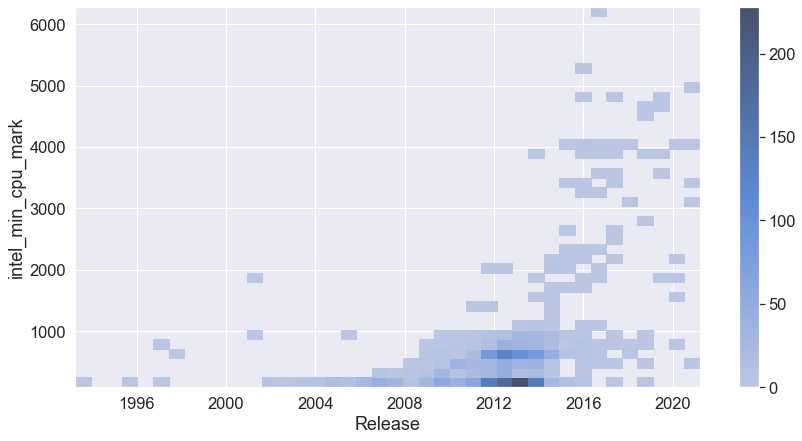

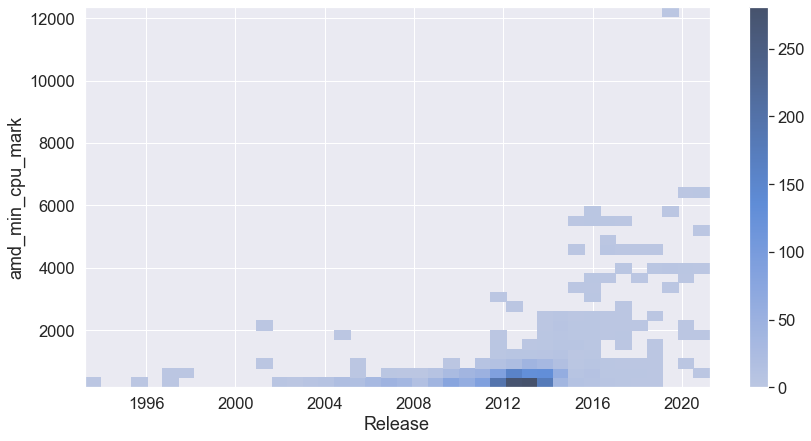

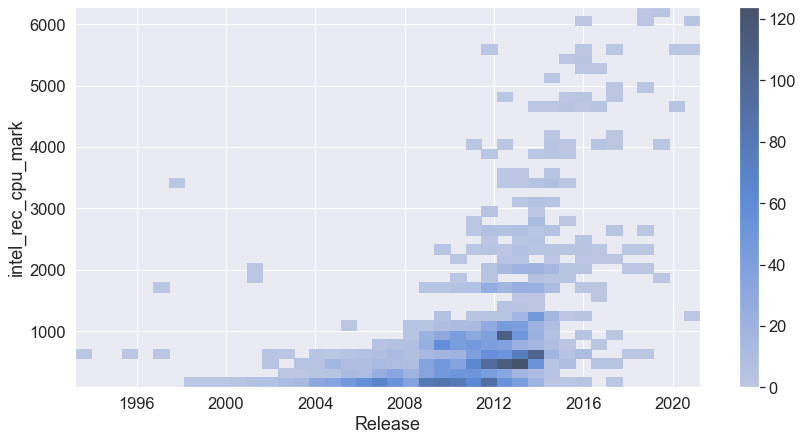

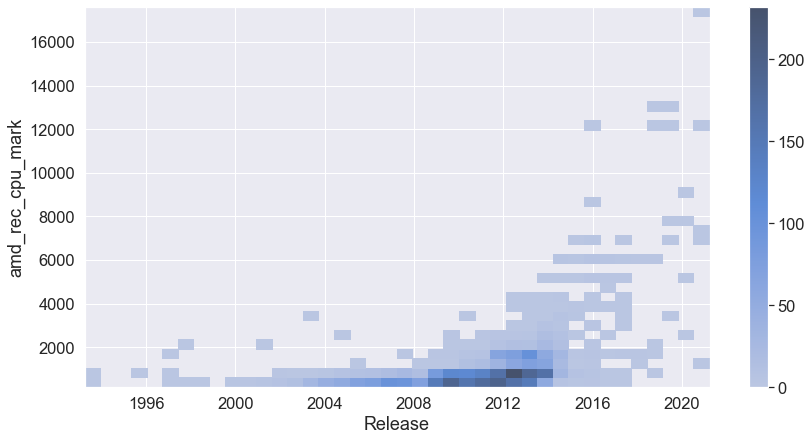

In [1335]:
for col in ['intel_min_cpu_mark', 'amd_min_cpu_mark', 'intel_rec_cpu_mark', 'amd_rec_cpu_mark']:
    plt.figure(figsize=(14,7))
    sns.histplot(data=df.dropna(subset=[col]), y=col, x='Release',bins=40,cbar=True)

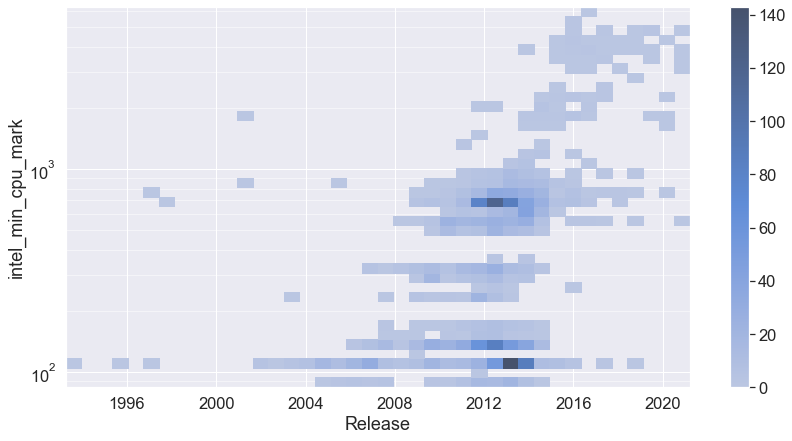

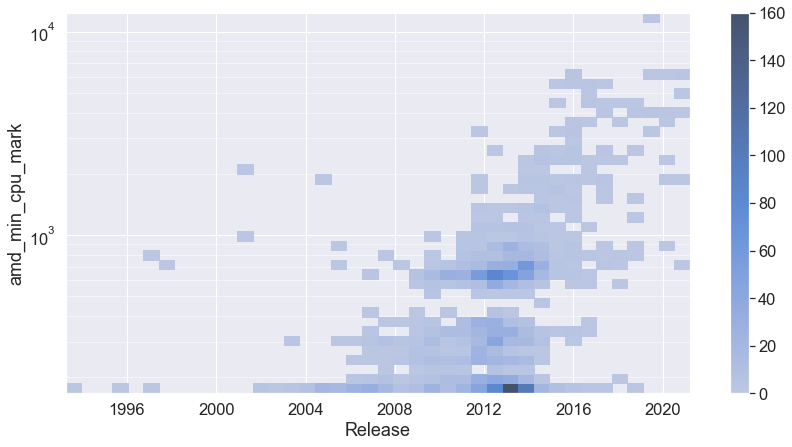

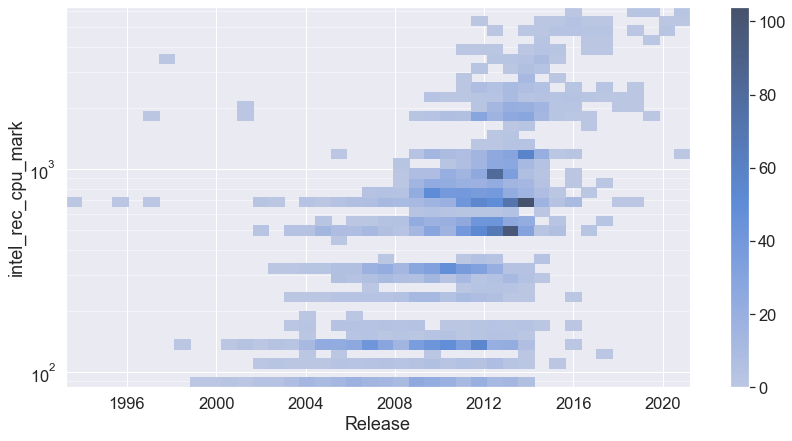

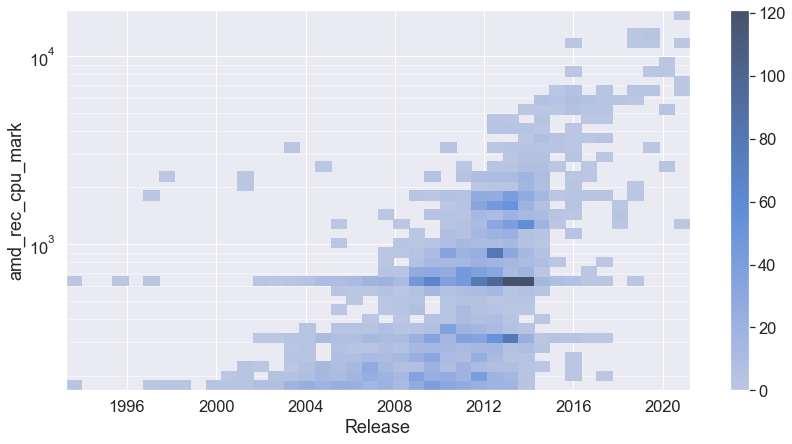

In [1336]:
for col in ['intel_min_cpu_mark', 'amd_min_cpu_mark', 'intel_rec_cpu_mark', 'amd_rec_cpu_mark']:
    plt.figure(figsize=(14,7))
    sns.histplot(data=df.dropna(subset=[col]), y=col, x='Release',bins=40,cbar=True, log_scale=(False, True))
    ax = plt.gca()
    ax.grid(b=True, which='major', color='w', linewidth=1.0)
    ax.grid(b=True, which='minor', color='w', linewidth=0.5)

In [1341]:
# fitting exponential
x = df['Release'].dt.year - 2000
y = df.amd_rec_cpu_mark
x, y = x[x.notnull() & y.notnull()], y[x.notnull() & y.notnull()]
fit_params = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
fit_params

array([0.23176869, 4.33395961])

In [1342]:
y_fit = np.exp(fit_params[1]) * np.exp(fit_params[0] * x)
y_fit

0        486.924530
1        486.924530
2        486.924530
3        306.302066
4        386.194238
           ...     
8561    1956.126053
8562    1956.126053
8565    1956.126053
8566    1956.126053
8567    1956.126053
Name: Release, Length: 4183, dtype: float64

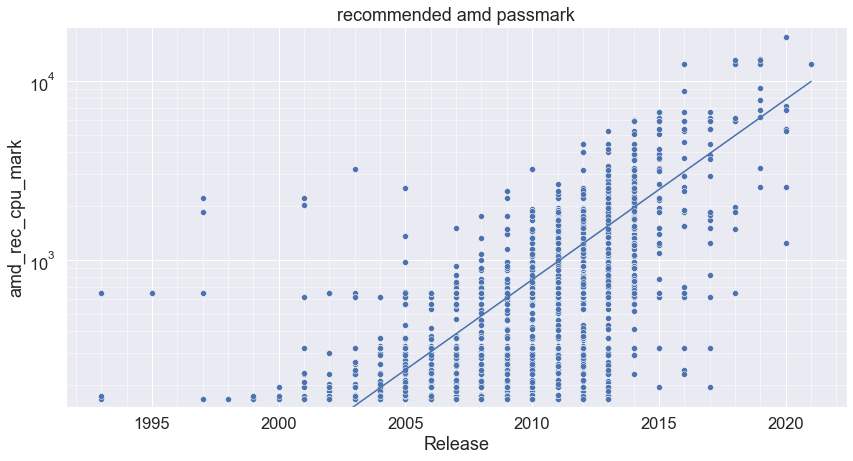

In [1350]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('recommended amd passmark')
sns.scatterplot(y=df.amd_rec_cpu_mark,x=df['Release'].dt.year,ax=ax)
sns.lineplot(y=y_fit,x=x+2_000,ax=ax)
ax.set(yscale="log")
ax.set_ylim(150, 20_000)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

In [1358]:
pd.Series(np.exp(fit_params[1]) * np.exp(fit_params[0] * np.arange(10, 30)), index=np.arange(10, 30)+2000)

2010      774.057783
2011      975.953769
2012     1230.509893
2013     1551.461395
2014     1956.126053
2015     2466.338608
2016     3109.628910
2017     3920.707372
2018     4943.337851
2019     6232.699049
2020     7858.361821
2021     9908.043052
2022    12492.338653
2023    15750.691049
2024    19858.913164
2025    25038.674864
2026    31569.463735
2027    39803.665567
2028    50185.578249
2029    63275.385026
dtype: float64

In [1359]:
# fitting exponential
x = df['Release'].dt.year - 2000
y = df.amd_min_cpu_mark
x, y = x[x.notnull() & y.notnull()], y[x.notnull() & y.notnull()]
fit_params = np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
fit_params

array([0.23584112, 3.63614241])

In [1360]:
y_fit = np.exp(fit_params[1]) * np.exp(fit_params[0] * x)
y_fit

0        250.352853
2        250.352853
5        643.058565
6        250.352853
7        156.208102
           ...     
8561    1030.622258
8562    1030.622258
8565    1030.622258
8566    1030.622258
8567    1030.622258
Name: Release, Length: 2489, dtype: float64

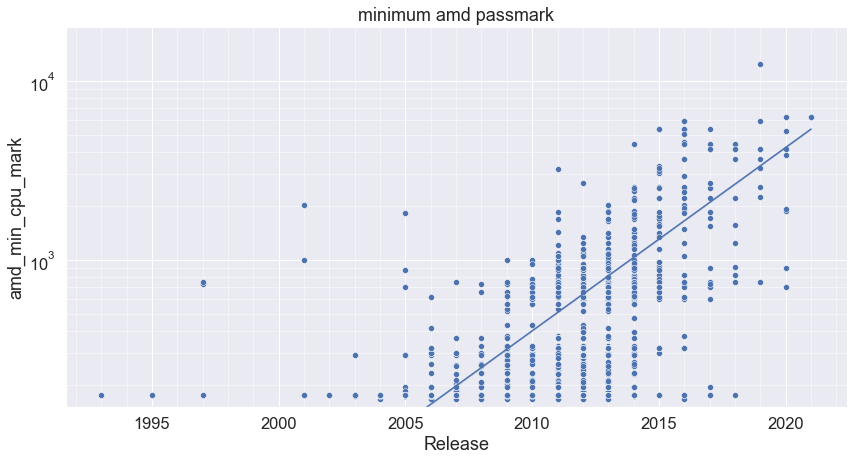

In [1361]:
plt.figure(figsize=(14, 7))
ax = plt.gca()
plt.title('minimum amd passmark')
sns.scatterplot(y=df.amd_min_cpu_mark,x=df['Release'].dt.year,ax=ax)
sns.lineplot(y=y_fit,x=x+2_000,ax=ax)
ax.set(yscale="log")
ax.set_ylim(150, 20_000)
ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
ax.grid(b=True, which='major', color='w', linewidth=1.0)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)

In [1362]:
pd.Series(np.exp(fit_params[1]) * np.exp(fit_params[0] * np.arange(10, 30)), index=np.arange(10, 30)+2000)

2010      401.237519
2011      507.955926
2012      643.058565
2013      814.094878
2014     1030.622258
2015     1304.740108
2016     1651.765947
2017     2091.091341
2018     2647.265495
2019     3351.367041
2020     4242.740695
2021     5371.195808
2022     6799.789684
2023     8608.351175
2024    10897.941465
2025    13796.501300
2026    17466.000230
2027    22111.487353
2028    27992.549327
2029    35437.815888
dtype: float64

### and now gpu

In [1401]:
df_gpu = pd.read_csv('gpu_passmark.csv')


In [1402]:
df_gpu

,Videocard Name,Passmark G3D Mark (higher is better),Rank (lower is better),Videocard Value (higher is better),Price (USD)
0,128 DDR Radeon 9700 TX w/TV-Out,44,1859,NaN,NaN
1,128 DDR Radeon 9800 Pro,62,1800,NaN,NaN
2,128MB DDR Radeon 9800 Pro,66,1790,NaN,NaN
3,128MB RADEON X600 SE,49,1843,NaN,NaN
4,15FF,8229,128,NaN,NaN
...,...,...,...,...,...
2177,Xabre,5,2052,NaN,NaN
2178,XFX Radeon HD 4650 AGP,109,1641,NaN,NaN
2179,XGI Volari Family v1.13.23.D_V,4,2070,NaN,NaN
2180,ZX Chrome 645/640 GPU,147,1544,NaN,NaN


In [1403]:
df_gpu.describe()

,Passmark G3D Mark (higher is better),Rank (lower is better),Videocard Value (higher is better)
count,2182.000000,2182.000000,469.000000
mean,1803.019707,1066.626031,12.481620
std,3422.667137,629.818202,13.940197
min,1.000000,-1.000000,0.000000
25%,117.000000,521.250000,2.050000
50%,602.500000,1066.500000,7.340000
75%,1586.000000,1611.750000,17.500000
max,25993.000000,2157.000000,79.960000


In [1404]:
df_gpu.describe(include=np.object)

,Videocard Name,Price (USD)
count,2182,469
unique,2182,370
top,"Radeon R5 A6-9400 RADEON R5, 6 COMPUTE CORES 2...",$59.99*
freq,1,7


In [1407]:
df_nvidia_gpu = df_gpu[(df_gpu['Videocard Name'].str.contains('NVidia')) | (df_gpu['Videocard Name'].str.contains('GeForce'))].copy()
#df_nvidia_gpu['model'] = df_nvidia_gpu['CPU Name'].str.replace('Intel ', '', regex=False).str.replace('@ ', '', regex=False)
#df_nvidia_gpu['model']
df_nvidia_gpu

,Videocard Name,Passmark G3D Mark (higher is better),Rank (lower is better),Videocard Value (higher is better),Price (USD)
8,64MB DDR GeForce3 Ti 200,5,2037,NaN,NaN
9,64MB GeForce2 MX with TV Out,2,2134,NaN,NaN
151,GeForce 205,126,1585,NaN,NaN
152,GeForce 210,96,1682,2.35,$40.99
153,GeForce 240M GT,319,1364,NaN,NaN
...,...,...,...,...,...
641,GeForce4 Ti 4800,5,2034,NaN,NaN
642,GeForce4 Ti 4800 SE,6,2019,NaN,NaN
643,GeForce9400M,105,1652,NaN,NaN
959,MONSTER GeForce GTX 675M,2637,359,NaN,NaN


In [ ]:
len(set(df['min_intel_cpu']).difference(set(df_intel_cpu['model'])))

In [ ]:
set(df['min_intel_cpu']).difference(set(df_intel_cpu['model']))